<a href="https://colab.research.google.com/github/jlborrego/Employee-Attrition/blob/main/TFG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importación librerías y dataset

In [79]:
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, PolynomialFeatures, LabelEncoder, scale
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV
from collections import Counter
import xgboost as xgb
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve





datos = pd.read_csv("https://raw.githubusercontent.com/jlborrego/Employee-Attrition/main/WA_Fn-UseC_-HR-Employee-Attrition.csv")
pd.set_option('display.max_columns', None) #Para que nos muestre todas las columnas
datos

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  \
0                  1                        2  Female          94   
1                  2                        3    Male          61   
2                  4                        4    Male          92   
3                  5                        4  Female          56   
4                  7                        1    Male          40   
...              ...                      ...     ...         ...   
1465            2061                        3    Male          41   
1466            2062                        4    Male          42   
1467            2064                        2    Male          87   
1468            2065                        4    Male          63   
1469            2068                        2    Male          82   

      JobInvolvement  JobLevel                    JobRole  JobSatisfaction  \
0                  3         2            Sales Executive                4   
1                  2         2         Research Scientist                2   
2                  2         1      Laboratory Technician                3   
3                  3         1         Research Scientist                3   
4                  3         1      Laboratory Technician                2   
...              ...       ...                        ...              ...   
1465               4         2      Laboratory Technician                4   
1466               2         3  Healthcare Representative                1   
1467               4         2     Manufacturing Director                2   
1468               2         2            Sales Executive                2   
1469               4         2      Laboratory Technician                3   

     MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18  \
0           Single           5993        19479                   8      Y   
1          Married           5130        24907                   1      Y   
2           Single           2090         2396                   6      Y   
3          Married           2909        23159                   1      Y   
4          Married           3468        16632                   9      Y   
...            ...            ...          ...  

# Primer vistazo a los datos

In [80]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Podemos ver que no hay valores nulos 👍

In [81]:
datos.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

Las columnas de EmployeeCount, EmployeeNumber, Over18, StandardHours no nos aportan ninguna información al tratarse de IDs, conteos o columnas con solo 1 valor único.
Por lo tanto descartamos estos datos.

In [82]:
datos.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'],axis="columns", inplace=True)
datos

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                    1          2  Life Sciences                        2   
1                    8          1  Life Sciences                        3   
2                    2          2          Other                        4   
3                    3          4  Life Sciences                        4   
4                    2          1        Medical                        1   
...                ...        ...            ...                      ...   
1465                23          2        Medical                        3   
1466                 6          1        Medical                        4   
1467                 4          3  Life Sciences                        2   
1468                 2          3        Medical                        4   
1469                 8          3        Medical                        2   

      Gender  HourlyRate  JobInvolvement  JobLevel                    JobRole  \
0     Female          94               3         2            Sales Executive   
1       Male          61               2         2         Research Scientist   
2       Male          92               2         1      Laboratory Technician   
3     Female          56               3         1         Research Scientist   
4       Male          40               3         1      Laboratory Technician   
...      ...         ...             ...       ...                        ...   
1465    Male          41               4         2      Laboratory Technician   
1466    Male          42               2         3  Healthcare Representative   
1467    Male          87               4         2     Manufacturing Director   
1468    Male          63               2         2            Sales Executive   
1469    Male          82               4         2      Laboratory Technician   

      JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  \
0                   4        Single           5993        19479   
1                   2       Married           5130        24907   
2                   3        Single           2090         2396   
3                   3       Married           2909        23159   
4                   2       Married           3468        16632   
...               ...           ...            ...          ...   
1465                4       Married           2571        12290   
1466                1       Married           9991        21457   
1467                2       Married           6142         5174   
1468                2       Married           5390        13243   
1469                3       Married           4404        10228   

      NumCompaniesWorked OverTime  PercentSalaryHike  PerformanceRating  \
0                      8      Yes                 11                  3   
1                      1       No                 23                  4   
2                      6      Yes                 15                  3   
3                      1      Yes                 11                  3   
4  

In [83]:
res_attrition = datos.groupby('Attrition')
res_attrition.mean()

<ipython-input-83-2f7dee05319f>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  res_attrition.mean()


Age   DailyRate  DistanceFromHome  Education  \
Attrition                                                       
No         37.561233  812.504461          8.915653   2.927007   
Yes        33.607595  750.362869         10.632911   2.839662   

           EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
Attrition                                                                  
No                        2.771290   65.952149        2.770479  2.145985   
Yes                       2.464135   65.573840        2.518987  1.637131   

           JobSatisfaction  MonthlyIncome   MonthlyRate  NumCompaniesWorked  \
Attrition                                                                     
No                2.778589    6832.739659  14265.779400            2.645580   
Yes               2.468354    4787.092827  14559.308017            2.940928   

           PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
Attrition                                                                   
No                 15.231144           3.153285                  2.733982   
Yes                15.097046           3.156118                  2.599156   

           StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
Attrition                                                               
No                 0.845093          11.862936               2.832928   
Yes                0.527426           8.244726               2.624473   

           WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
Attrition                                                        
No                2.781022        7.369019            4.484185   
Yes               2.658228        5.130802            2.902954   

           YearsSinceLastPromotion  YearsWithCurrManager  
Attrition                                                 
No                        2.234388              4.367397  
Yes                       1.945148              2.852321

No     1233
Yes     237
Name: Attrition, dtype: int64


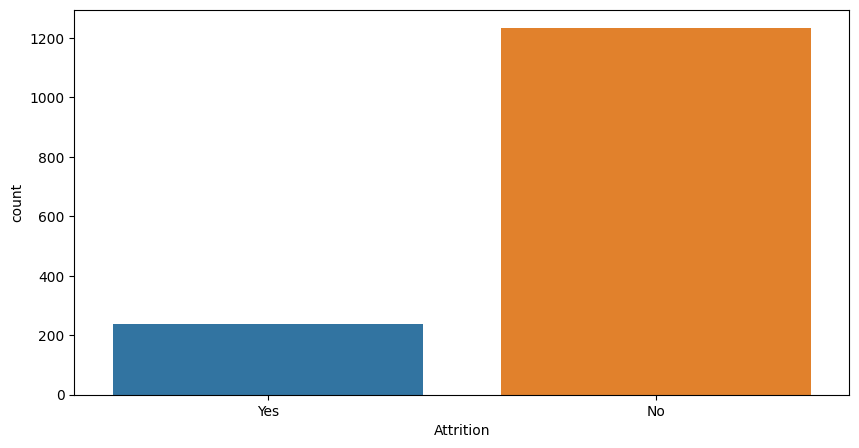

In [84]:
print(datos['Attrition'].value_counts())
plt.subplots(figsize=(10,5))
sns.countplot(data=datos, x='Attrition')
plt.show()


 1233 (84% de los casos) empleados no abandonaron la organización, mientras que 237 (16% de los casos) sí lo hicieron

In [85]:
cat_vars = [var for var in datos.columns if datos[var].dtype == 'O']
print('Num de var categóricas:')
print(len(cat_vars))
num_vars = [var for var in datos.columns if var not in cat_vars ]
print('Num de var numéricas:')
print(len(num_vars))


Num de var categóricas:
8
Num de var numéricas:
23


In [86]:
datos[cat_vars]

Attrition     BusinessTravel              Department EducationField  \
0          Yes      Travel_Rarely                   Sales  Life Sciences   
1           No  Travel_Frequently  Research & Development  Life Sciences   
2          Yes      Travel_Rarely  Research & Development          Other   
3           No  Travel_Frequently  Research & Development  Life Sciences   
4           No      Travel_Rarely  Research & Development        Medical   
...        ...                ...                     ...            ...   
1465        No  Travel_Frequently  Research & Development        Medical   
1466        No      Travel_Rarely  Research & Development        Medical   
1467        No      Travel_Rarely  Research & Development  Life Sciences   
1468        No  Travel_Frequently                   Sales        Medical   
1469        No      Travel_Rarely  Research & Development        Medical   

      Gender                    JobRole MaritalStatus OverTime  
0     Female            Sales Executive        Single      Yes  
1       Male         Research Scientist       Married       No  
2       Male      Laboratory Technician        Single      Yes  
3     Female         Research Scientist       Married      Yes  
4       Male      Laboratory Technician       Married       No  
...      ...                        ...           ...      ...  
1465    Male      Laboratory Technician       Married       No  
1466    Male  Healthcare Representative       Married       No  
1467    Male     Manufacturing Director       Married      Yes  
1468    Male            Sales Executive       Married       No  
1469    Male      Laboratory Technician       Married       No  

[1470 rows x 8 columns]

In [87]:
datos[num_vars]

Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0      41       1102                 1          2                        2   
1      49        279                 8          1                        3   
2      37       1373                 2          2                        4   
3      33       1392                 3          4                        4   
4      27        591                 2          1                        1   
...   ...        ...               ...        ...                      ...   
1465   36        884                23          2                        3   
1466   39        613                 6          1                        4   
1467   27        155                 4          3                        2   
1468   49       1023                 2          3                        4   
1469   34        628                 8          3                        2   

      HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  \
0             94               3         2                4           5993   
1             61               2         2                2           5130   
2             92               2         1                3           2090   
3             56               3         1                3           2909   
4             40               3         1                2           3468   
...          ...             ...       ...              ...            ...   
1465          41               4         2                4           2571   
1466          42               2         3                1           9991   
1467          87               4         2                2           6142   
1468          63               2         2                2           5390   
1469          82               4         2                3           4404   

      MonthlyRate  NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
0           19479                   8                 11                  3   
1           24907                   1                 23                  4   
2            2396                   6                 15                  3   
3           23159                   1                 11                  3   
4           16632                   9                 12                  3   
...           ...                 ...                ...                ...   
1465        12290                   4                 17                  3   
1466        21457                   4                 15                  3   
1467         5174                   1                 20                  4   
1468        13243                   2                 14                  3   
1469        10228                   2                 12                  3   

      RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                            1                 0                  8   
1                            4                 1                 10   
2                            2                 0                  7   
3                            3                 0                  8   
4                            4                 1                  6   
...                        ...               ...                ...   
1465                         3                 1                 17   
1466                         1                 1                  9   
1467                         2                 1                  6   
1468                         4                 0                 17   
1469                         1                 0                  6   

      TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                         0                1               6   
1                         3                3              10   
2                         3                3               0   
3                         3                3               8   
4         

# Resumen de datos

En un primer vistazo hemos podido ver varias cosas:

*   Estructura del conjunto de datos: 1470 observaciones (filas), 35 características (variables)

*   Datos que faltan: Por suerte no faltan datos, lo que facilitará el trabajo con el conjunto de datos.

*   Tipos de datos: En este conjunto de datos sólo tenemos dos tipos de datos: 8 categóricos y 23 enteros.

*   Target: 'Attrition' es el objetivo de nuestro conjunto de datos.

*   Conjunto de datos desbalanceado: 1237 (84% de los casos) empleados no abandonaron la organización, mientras que 237 (16% de los casos) sí lo hicieron, lo que hace que nuestro conjunto de datos se considere desequilibrado, ya que hay más personas que permanecen en la organización de las que realmente la abandonan.







# Gráficas generales

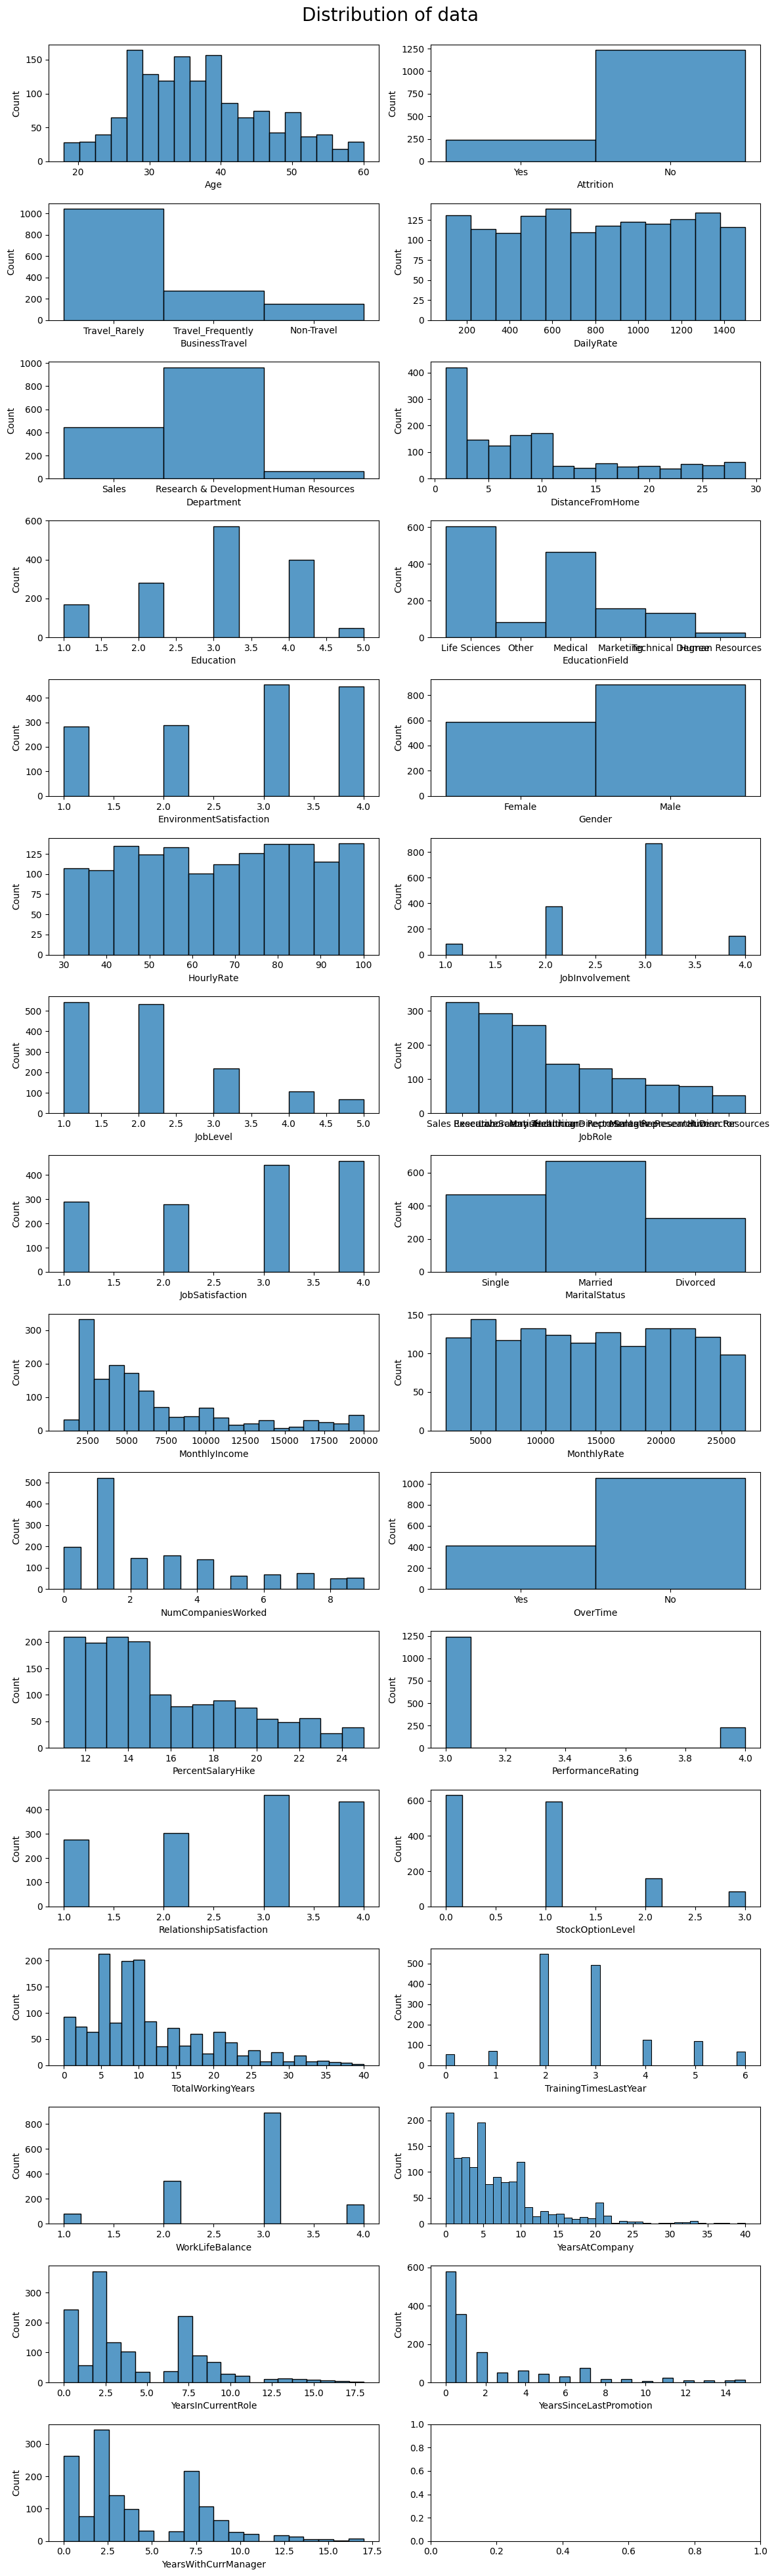

In [88]:
ncols = 2
nrows = np.ceil(len(datos.columns)/ncols).astype(int)
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(12,nrows*2.5))
for c, ax in zip(datos.columns, axs.flatten()):
    sns.histplot(datos, x=c, ax=ax)
fig.suptitle('Distribution of data', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.savefig('gráfica_OverView.pdf', dpi=fig.dpi)

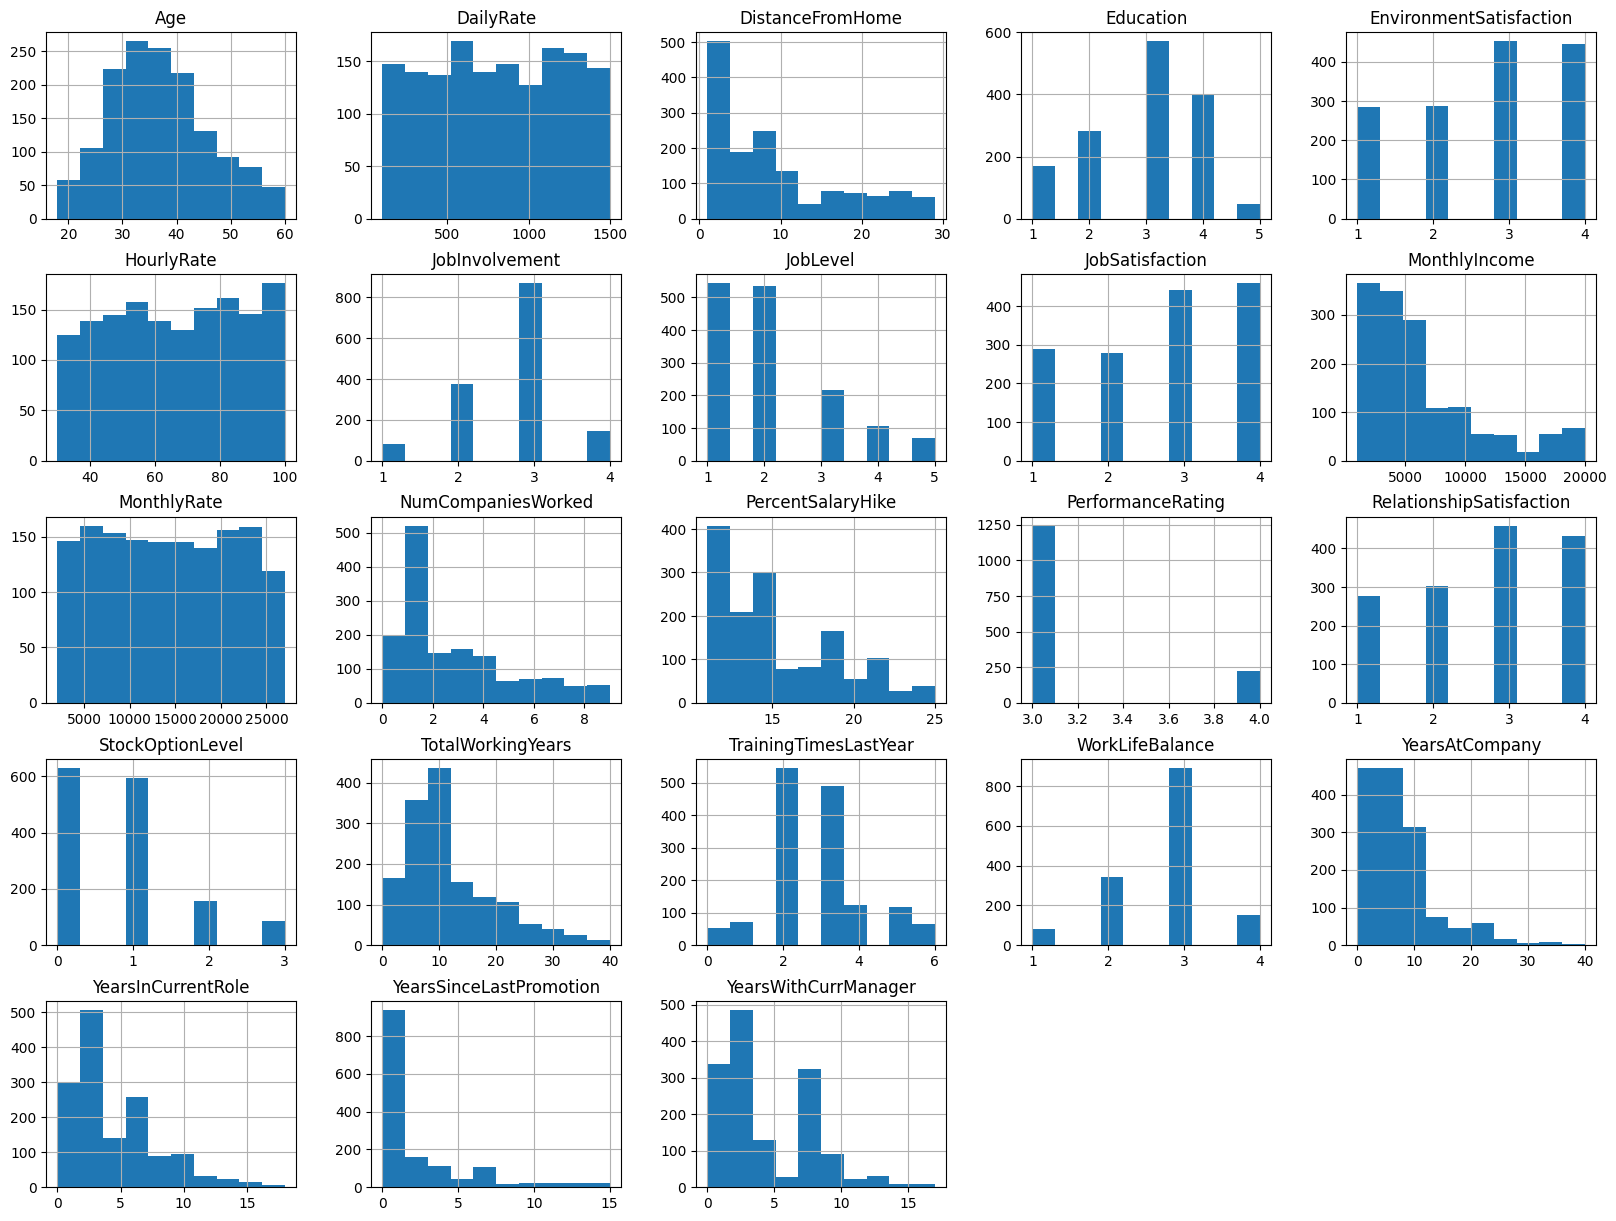

In [89]:
datos.hist(figsize=(20,15))
plt.show() 


# Gráficas de varibles Catégoricas

## Género (Gender)

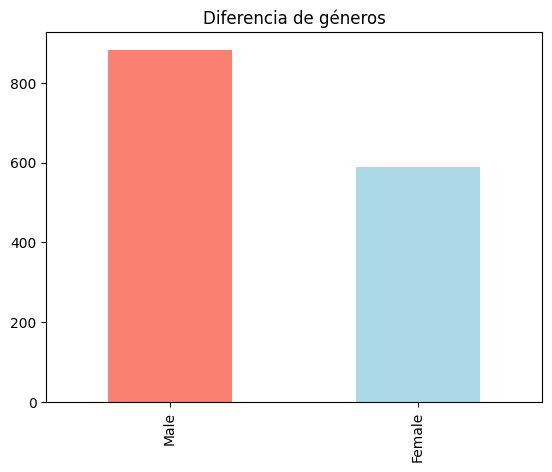

In [90]:
datos['Gender'].value_counts().plot(kind='bar',color=['salmon','lightblue'],title="Diferencia de géneros")
plt.savefig('gráfica_Gender.pdf', dpi=fig.dpi)

(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

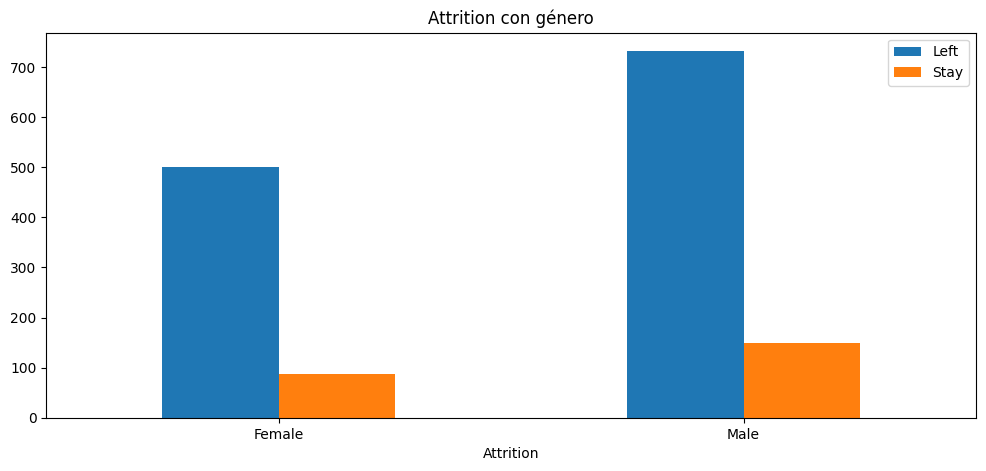

In [91]:
pd.crosstab(datos['Gender'],datos['Attrition']).plot(kind="bar",figsize=(12,5))
plt.title("Attrition con género")
plt.xlabel("Attrition")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)

## Horas extra (Overtime)

<Axes: title={'center': 'Horas extra'}>

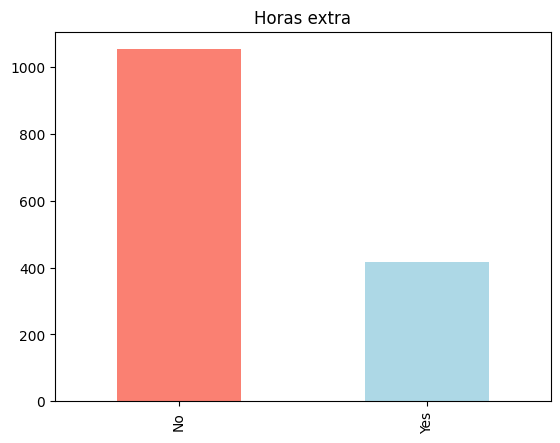

In [92]:
datos['OverTime'].value_counts().plot(kind='bar',color=['salmon','lightblue'],title="Horas extra")

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

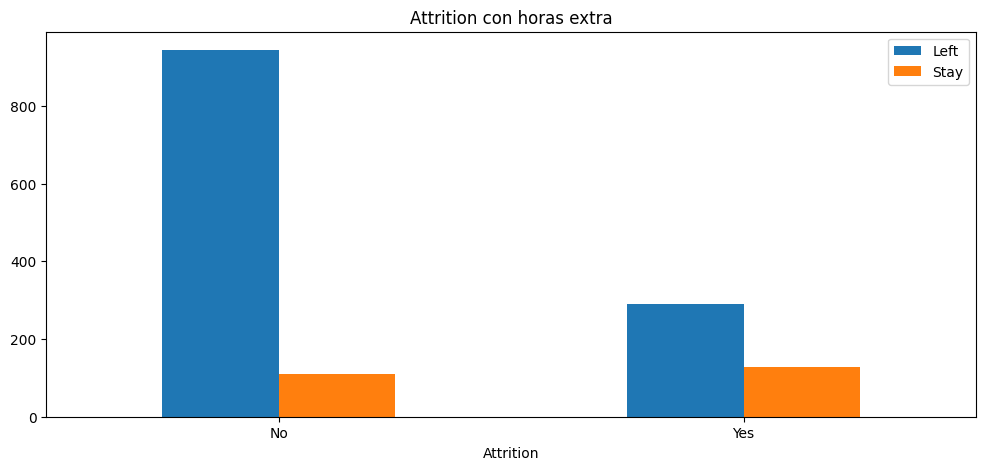

In [93]:
pd.crosstab(datos['OverTime'],datos['Attrition']).plot(kind="bar",figsize=(12,5))
plt.title("Attrition con horas extra")
plt.xlabel("Attrition")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)

## Viajar (BusinessTravel)

In [94]:
color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',  
                '#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8']

(array([0, 1, 2]),
 [Text(0, 0, 'Travel_Rarely'),
  Text(1, 0, 'Travel_Frequently'),
  Text(2, 0, 'Non-Travel')])

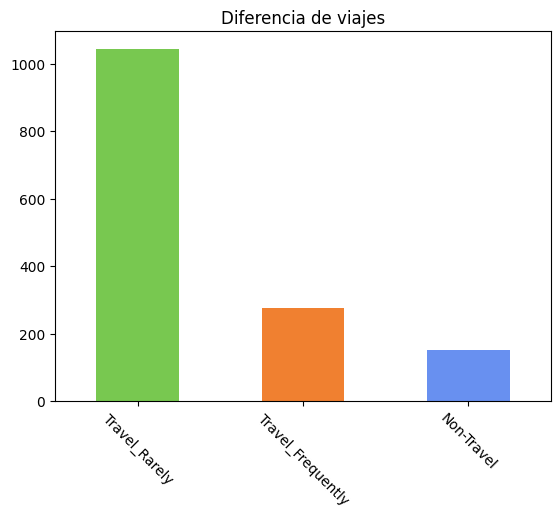

In [95]:
datos['BusinessTravel'].value_counts().plot(kind='bar',color=color_types,title="Diferencia de viajes")
plt.xticks(rotation=-45)

(array([0, 1, 2]),
 [Text(0, 0, 'Non-Travel'),
  Text(1, 0, 'Travel_Frequently'),
  Text(2, 0, 'Travel_Rarely')])

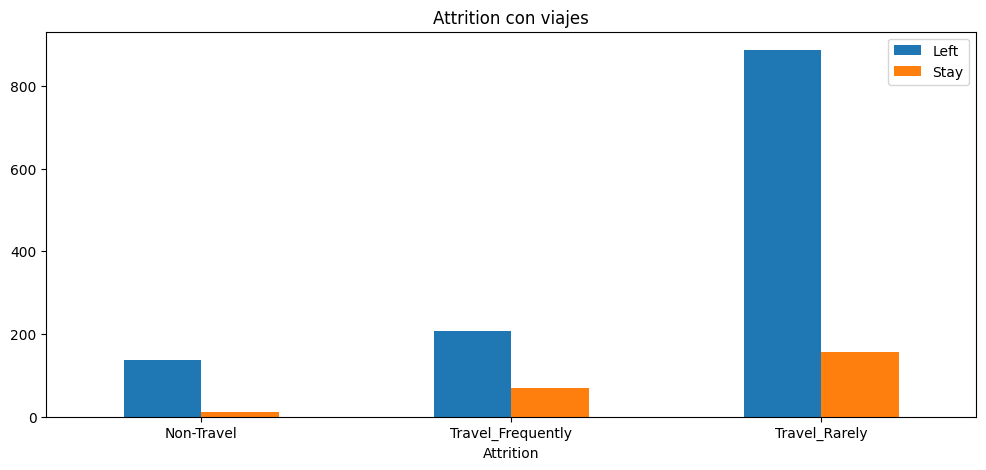

In [96]:
pd.crosstab(datos['BusinessTravel'],datos['Attrition']).plot(kind="bar",figsize=(12,5))
plt.title("Attrition con viajes")
plt.xlabel("Attrition")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)

## Departamento (Department)

(array([0, 1, 2]),
 [Text(0, 0, 'Research & Development'),
  Text(1, 0, 'Sales'),
  Text(2, 0, 'Human Resources')])

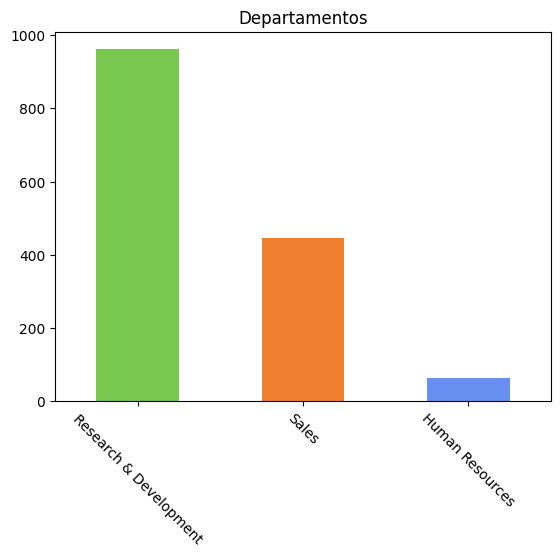

In [97]:
datos['Department'].value_counts().plot(kind='bar',color=color_types,title="Departamentos")
plt.xticks(rotation=-45)

(array([0, 1, 2]),
 [Text(0, 0, 'Human Resources'),
  Text(1, 0, 'Research & Development'),
  Text(2, 0, 'Sales')])

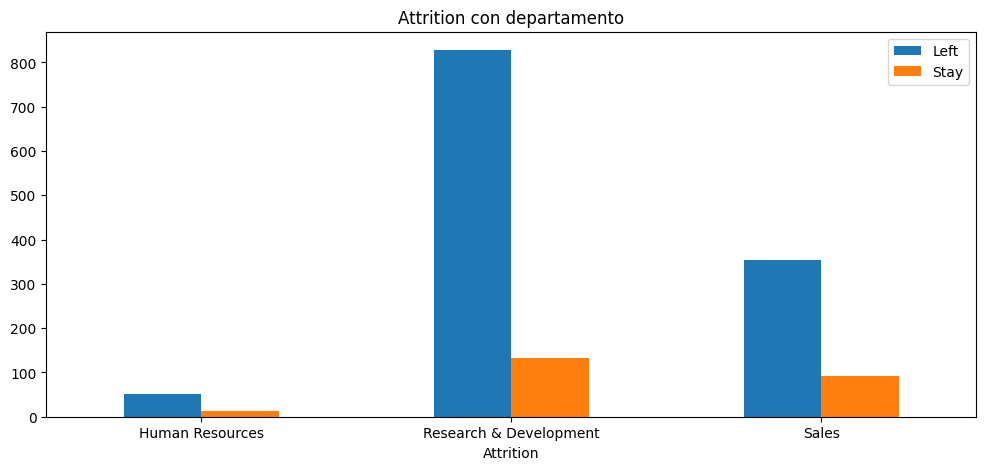

In [98]:
pd.crosstab(datos['Department'],datos['Attrition']).plot(kind="bar",figsize=(12,5))
plt.title("Attrition con departamento")
plt.xlabel("Attrition")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)

## 

## Tipo de estudios (EducationField)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Life Sciences'),
  Text(1, 0, 'Medical'),
  Text(2, 0, 'Marketing'),
  Text(3, 0, 'Technical Degree'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Human Resources')])

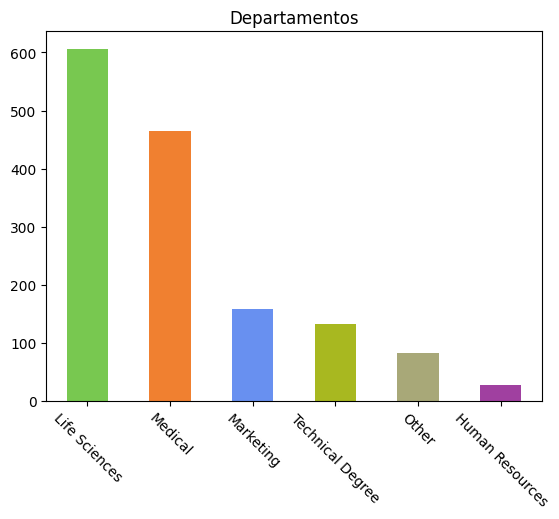

In [99]:
datos['EducationField'].value_counts().plot(kind='bar',color=color_types,title="Departamentos")
plt.xticks(rotation=-45)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Human Resources'),
  Text(1, 0, 'Life Sciences'),
  Text(2, 0, 'Marketing'),
  Text(3, 0, 'Medical'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Technical Degree')])

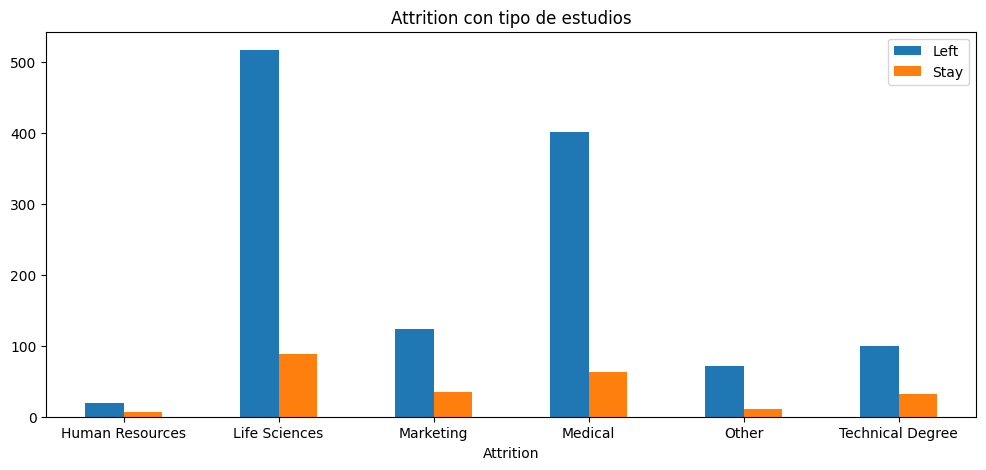

In [100]:
pd.crosstab(datos['EducationField'],datos['Attrition']).plot(kind="bar",figsize=(12,5))
plt.title("Attrition con tipo de estudios")
plt.xlabel("Attrition")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)

## Rol de trabajo (JobRole)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Research Scientist'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manufacturing Director'),
  Text(4, 0, 'Healthcare Representative'),
  Text(5, 0, 'Manager'),
  Text(6, 0, 'Sales Representative'),
  Text(7, 0, 'Research Director'),
  Text(8, 0, 'Human Resources')])

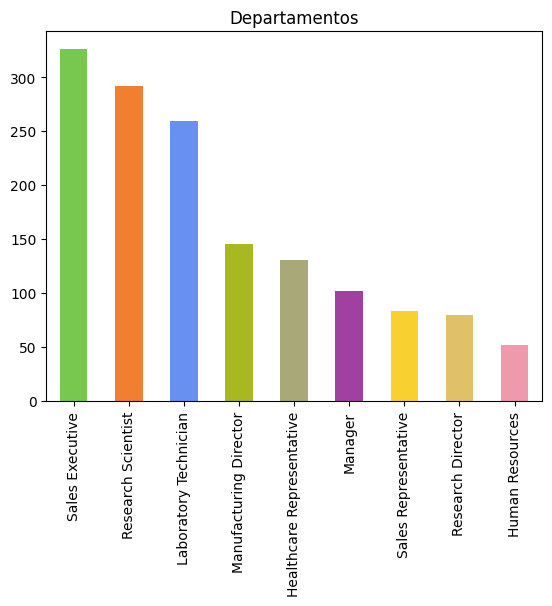

In [101]:
datos['JobRole'].value_counts().plot(kind='bar',color=color_types,title="Departamentos")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Healthcare Representative'),
  Text(1, 0, 'Human Resources'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manager'),
  Text(4, 0, 'Manufacturing Director'),
  Text(5, 0, 'Research Director'),
  Text(6, 0, 'Research Scientist'),
  Text(7, 0, 'Sales Executive'),
  Text(8, 0, 'Sales Representative')])

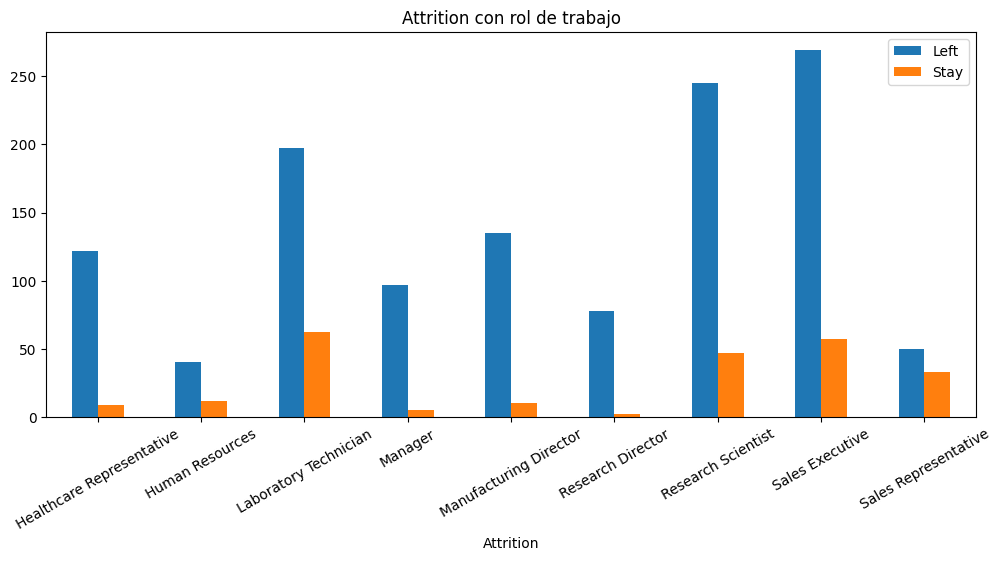

In [102]:
pd.crosstab(datos['JobRole'],datos['Attrition']).plot(kind="bar",figsize=(12,5))
plt.title("Attrition con rol de trabajo")
plt.xlabel("Attrition")
plt.legend(["Left","Stay"])
plt.xticks(rotation=30)


## Estado civil (MaritalStatus)

<Axes: title={'center': 'Departamentos'}>

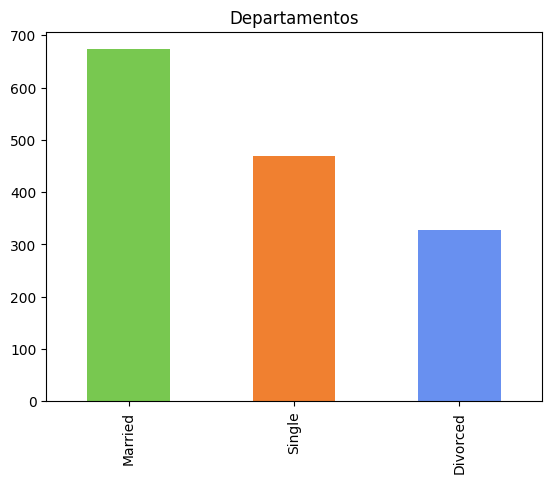

In [103]:
datos['MaritalStatus'].value_counts().plot(kind='bar',color=color_types ,title="Departamentos")

(array([0, 1, 2]),
 [Text(0, 0, 'Divorced'), Text(1, 0, 'Married'), Text(2, 0, 'Single')])

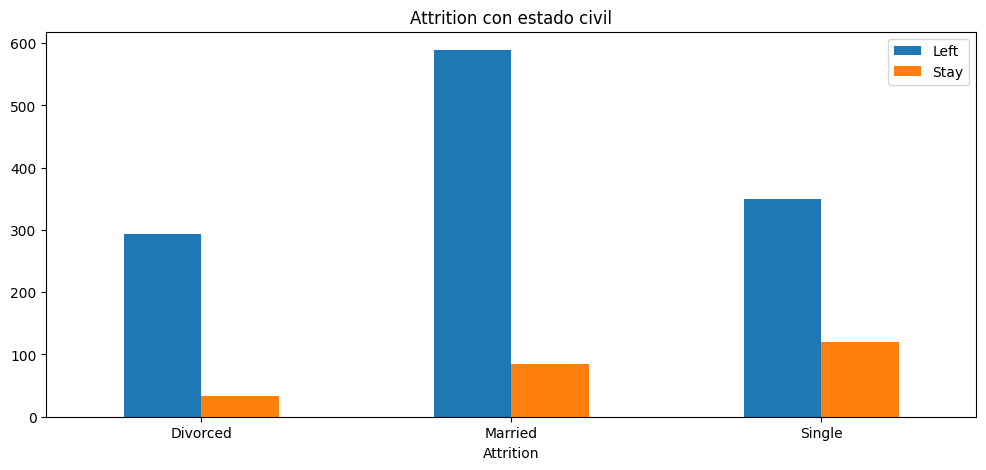

In [104]:
pd.crosstab(datos['MaritalStatus'],datos['Attrition']).plot(kind="bar",figsize=(12,5))
plt.title("Attrition con estado civil")
plt.xlabel("Attrition")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)

# **Gráficas de variables númericas**

## Edad (Age)

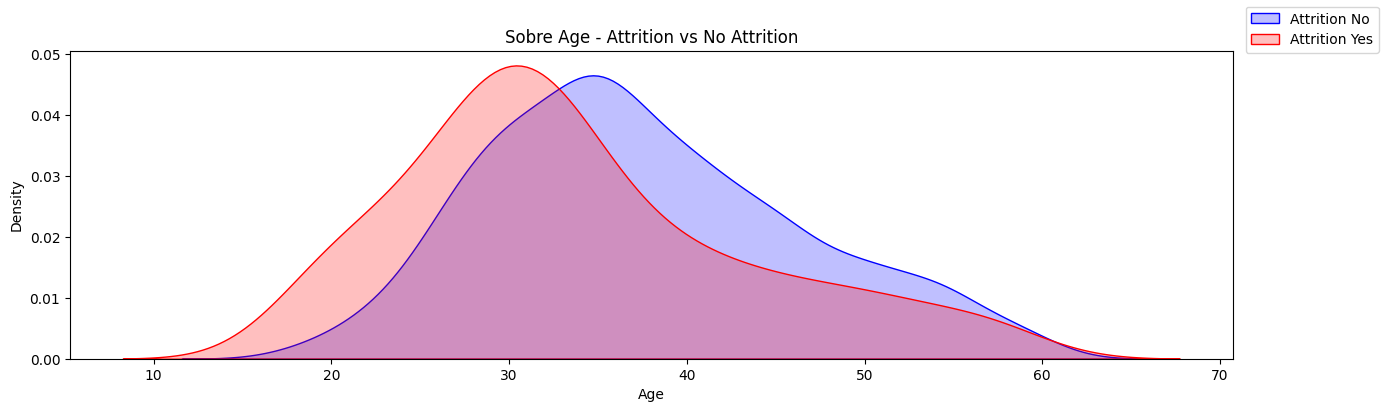

In [105]:
fig = plt.figure(figsize=(15,4))

ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'No'),'Age'] , color='b',fill=True,label='no Attrition')
ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'Yes'),'Age'] , color='r',fill=True, label='Attrition')

fig.legend(labels=['Attrition No', 'Attrition Yes'])
plt.title('Sobre Age - Attrition vs No Attrition')
plt.show()
fig.savefig('gráfica_Age.pdf')
#sns_plot.figure.savefig("output.png")
#plt.savefig('gráfica_Age.pdf')

## Tasa diaria (DailyRate)

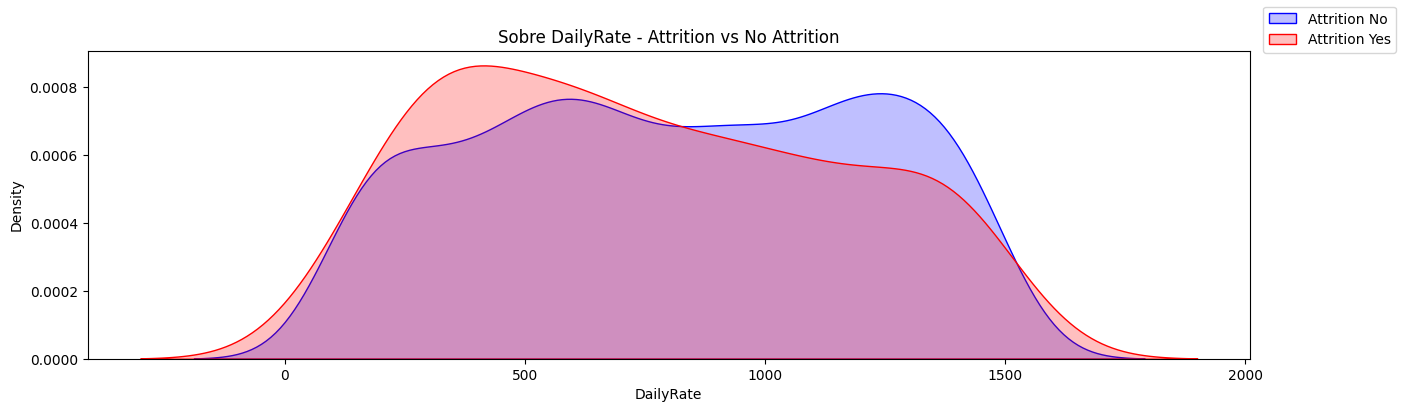

<Figure size 640x480 with 0 Axes>

In [106]:
fig = plt.figure(figsize=(15,4))

ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'No'),'DailyRate'] , color='b',fill=True,label='no Attrition')
ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'Yes'),'DailyRate'] , color='r',fill=True, label='Attrition')

fig.legend(labels=['Attrition No', 'Attrition Yes'])
plt.title('Sobre DailyRate - Attrition vs No Attrition')
plt.show()
plt.savefig('gráfica_DailyRate.pdf', dpi=fig.dpi)

## Distancia desde casa (DistanceFromHome)

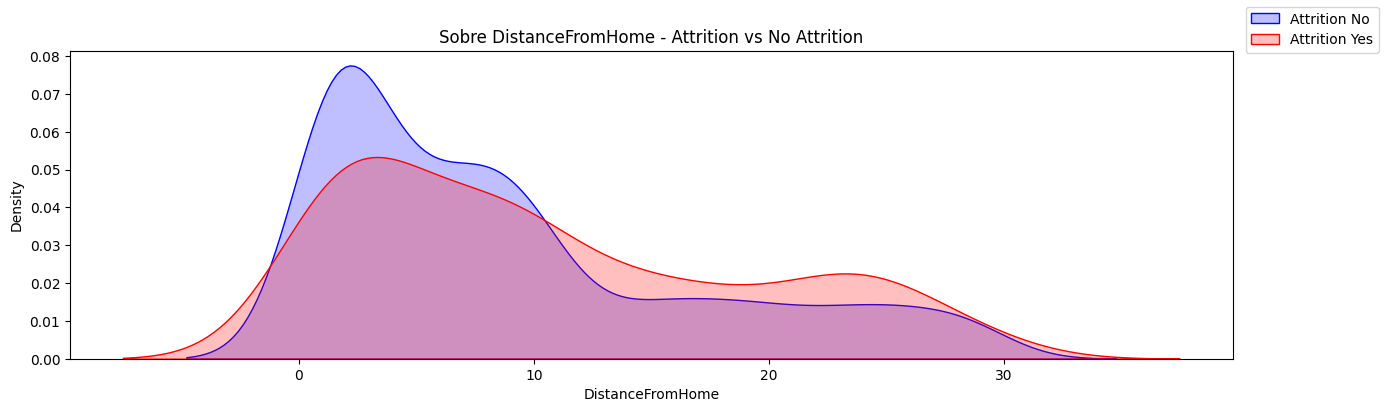

<Figure size 640x480 with 0 Axes>

In [107]:
fig = plt.figure(figsize=(15,4))

ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'No'),'DistanceFromHome'] , color='b',fill=True,label='no Attrition')
ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'Yes'),'DistanceFromHome'] , color='r',fill=True, label='Attrition')

fig.legend(labels=['Attrition No', 'Attrition Yes'])
plt.title('Sobre DistanceFromHome - Attrition vs No Attrition')
plt.show()
plt.savefig('gráfica_DistanceFromHome.pdf', dpi=fig.dpi)

## Educación (Education)

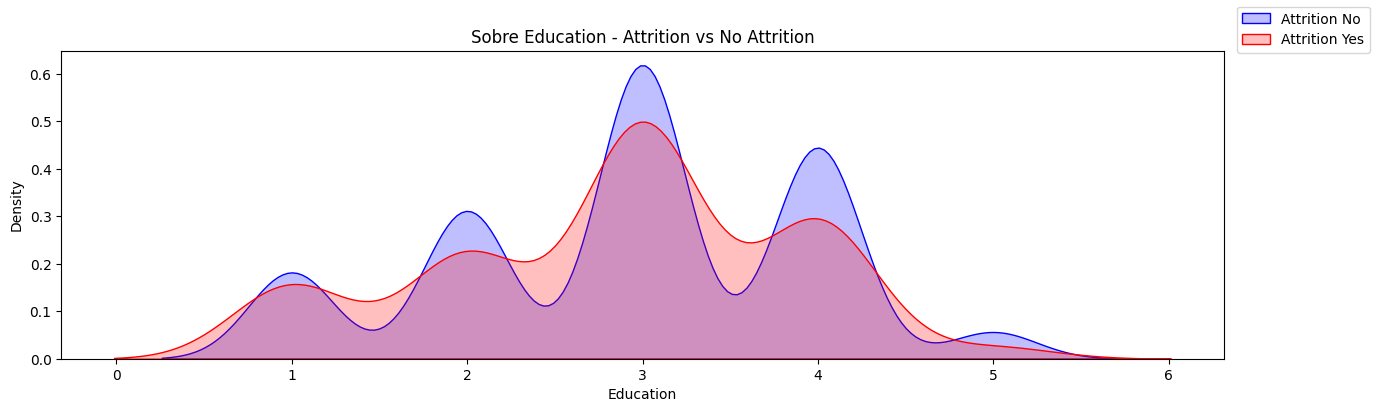

<Figure size 640x480 with 0 Axes>

In [108]:
fig = plt.figure(figsize=(15,4))

ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'No'),'Education'] , color='b',fill=True,label='no Attrition')
ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'Yes'),'Education'] , color='r',fill=True, label='Attrition')

fig.legend(labels=['Attrition No', 'Attrition Yes'])
plt.title('Sobre Education - Attrition vs No Attrition')
plt.show()
plt.savefig('gráfica_Education.pdf', dpi=fig.dpi)

## Satisfacción con el entorno (EnvironmentSatisfaction)

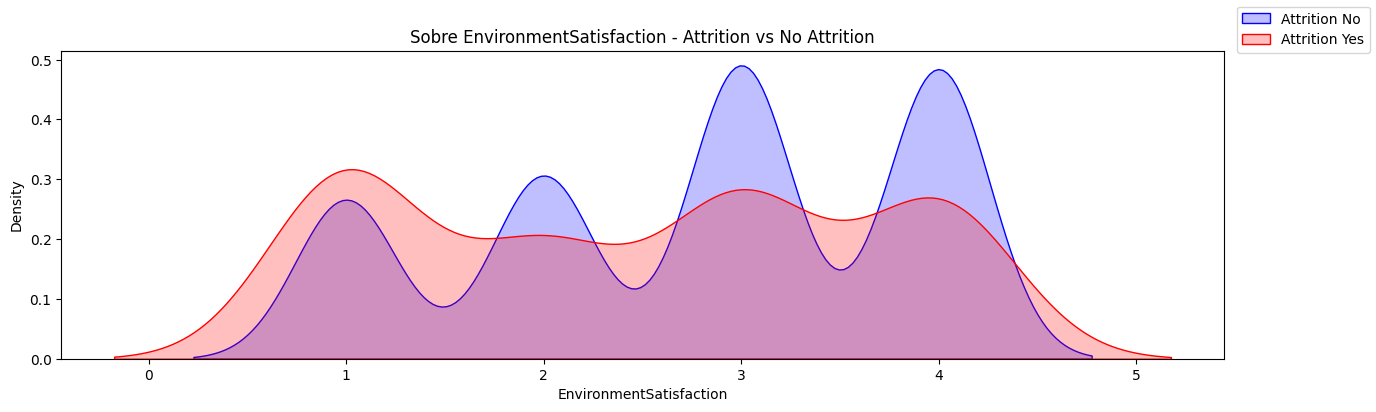

<Figure size 640x480 with 0 Axes>

In [109]:
fig = plt.figure(figsize=(15,4))

ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'No'),'EnvironmentSatisfaction'] , color='b',fill=True,label='no Attrition')
ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'Yes'),'EnvironmentSatisfaction'] , color='r',fill=True, label='Attrition')

fig.legend(labels=['Attrition No', 'Attrition Yes'])
plt.title('Sobre EnvironmentSatisfaction - Attrition vs No Attrition')
plt.show()
plt.savefig('gráfica_EnvironmentSatisfaction.pdf', dpi=fig.dpi)

## Tasa por hora de trabajo (HourlyRate)

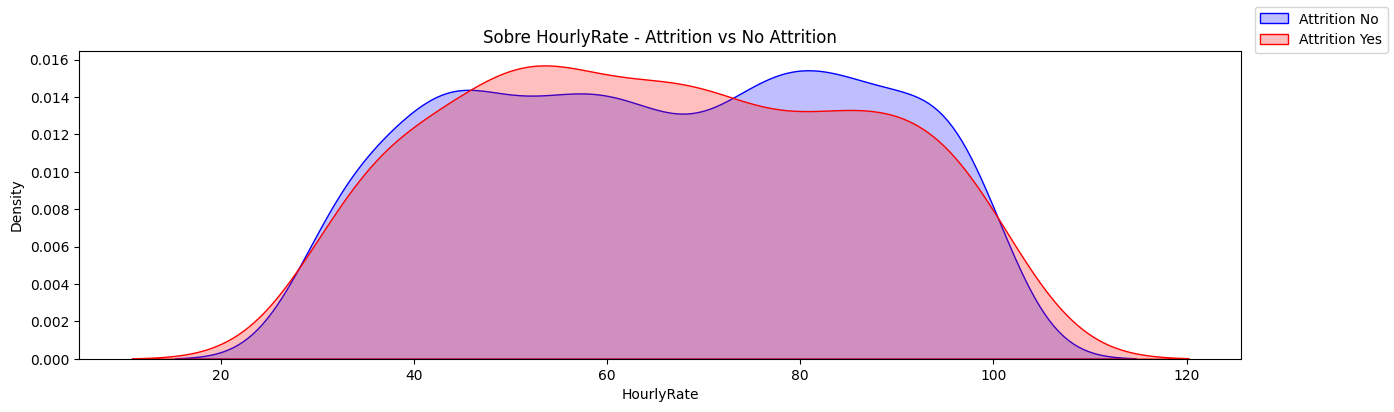

<Figure size 640x480 with 0 Axes>

In [110]:
fig = plt.figure(figsize=(15,4))

ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'No'),'HourlyRate'] , color='b',fill=True,label='no Attrition')
ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'Yes'),'HourlyRate'] , color='r',fill=True, label='Attrition')

fig.legend(labels=['Attrition No', 'Attrition Yes'])
plt.title('Sobre HourlyRate - Attrition vs No Attrition')
plt.show()
plt.savefig('gráfica_HourlyRate.pdf', dpi=fig.dpi)

## Implicación en el trabajo (JobInvolvement)

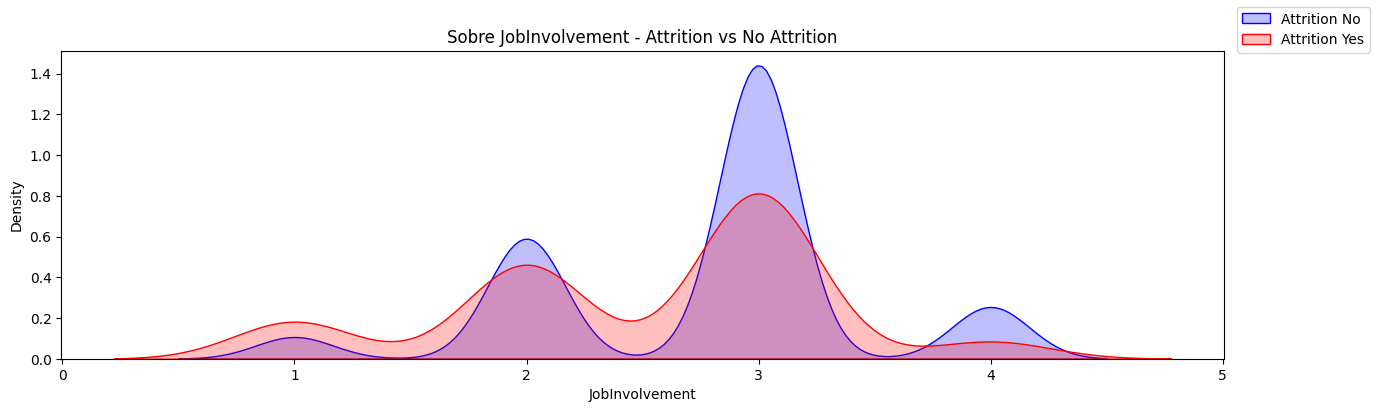

<Figure size 640x480 with 0 Axes>

In [111]:
fig = plt.figure(figsize=(15,4))

ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'No'),'JobInvolvement'] , color='b',fill=True,label='no Attrition')
ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'Yes'),'JobInvolvement'] , color='r',fill=True, label='Attrition')

fig.legend(labels=['Attrition No', 'Attrition Yes'])
plt.title('Sobre JobInvolvement - Attrition vs No Attrition')
plt.show()
plt.savefig('gráfica_JobInvolvement.pdf', dpi=fig.dpi)

## Nivel de trabajo (JobLevel)

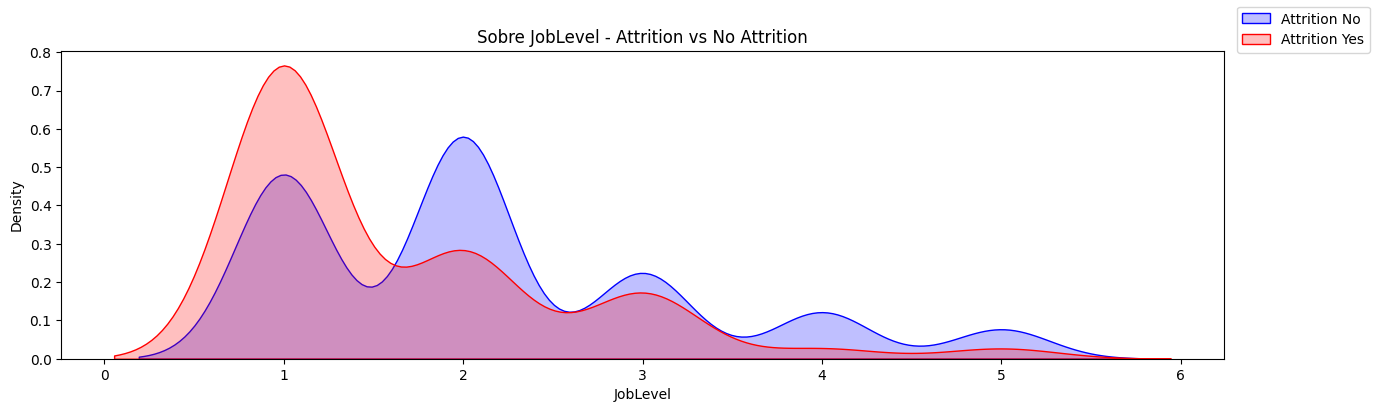

<Figure size 640x480 with 0 Axes>

In [112]:
fig = plt.figure(figsize=(15,4))

ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'No'),'JobLevel'] , color='b',fill=True,label='no Attrition')
ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'Yes'),'JobLevel'] , color='r',fill=True, label='Attrition')

fig.legend(labels=['Attrition No', 'Attrition Yes'])
plt.title('Sobre JobLevel - Attrition vs No Attrition')
plt.show()
plt.savefig('gráfica_JobLevel.pdf', dpi=fig.dpi)

## Satisfacción con el trabajo (JobSatisfaction)

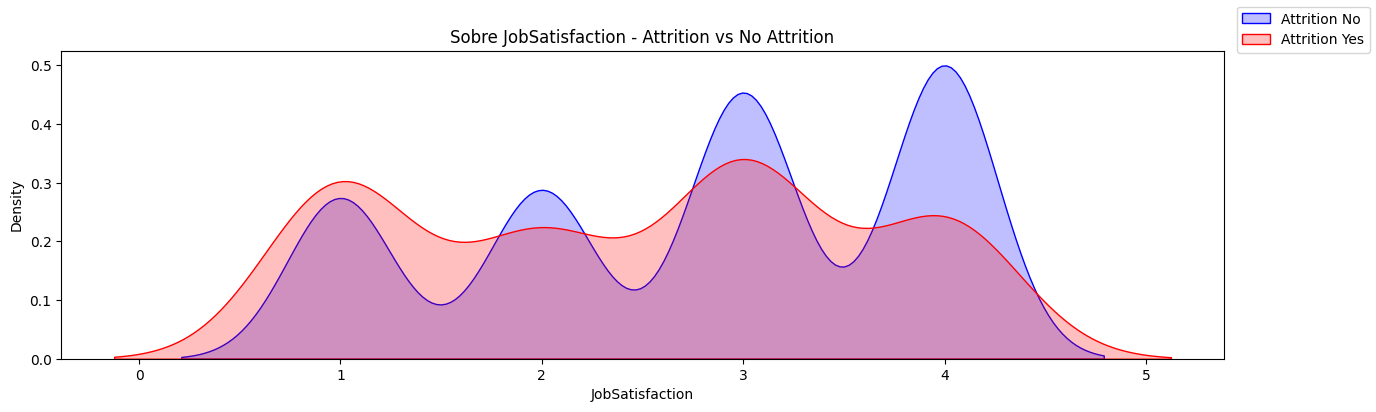

<Figure size 640x480 with 0 Axes>

In [113]:
fig = plt.figure(figsize=(15,4))

ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'No'),'JobSatisfaction'] , color='b',fill=True,label='no Attrition')
ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'Yes'),'JobSatisfaction'] , color='r',fill=True, label='Attrition')

fig.legend(labels=['Attrition No', 'Attrition Yes'])
plt.title('Sobre JobSatisfaction - Attrition vs No Attrition')
plt.show()
plt.savefig('gráfica_JobSatisfaction.pdf', dpi=fig.dpi)

##  Ingreso mensual (MonthlyIncome)

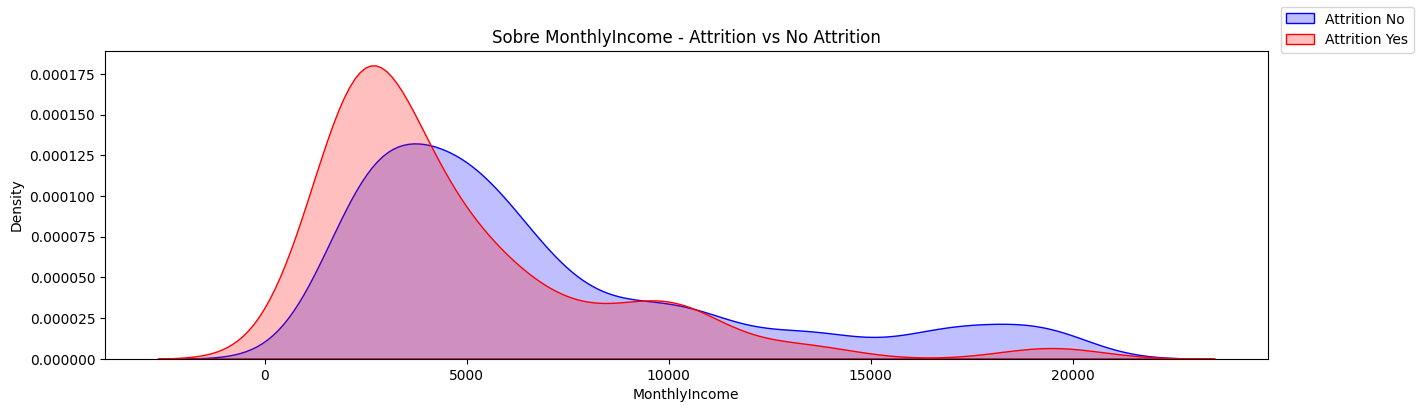

<Figure size 640x480 with 0 Axes>

In [114]:
fig = plt.figure(figsize=(15,4))

ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'No'),'MonthlyIncome'] , color='b',fill=True,label='no Attrition')
ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'Yes'),'MonthlyIncome'] , color='r',fill=True, label='Attrition')

fig.legend(labels=['Attrition No', 'Attrition Yes'])
plt.title('Sobre MonthlyIncome - Attrition vs No Attrition')
plt.show()
plt.savefig('gráfica_MonthlyIncome.pdf', dpi=fig.dpi)

##  Tasa mensual de pago (MonthlyRate)

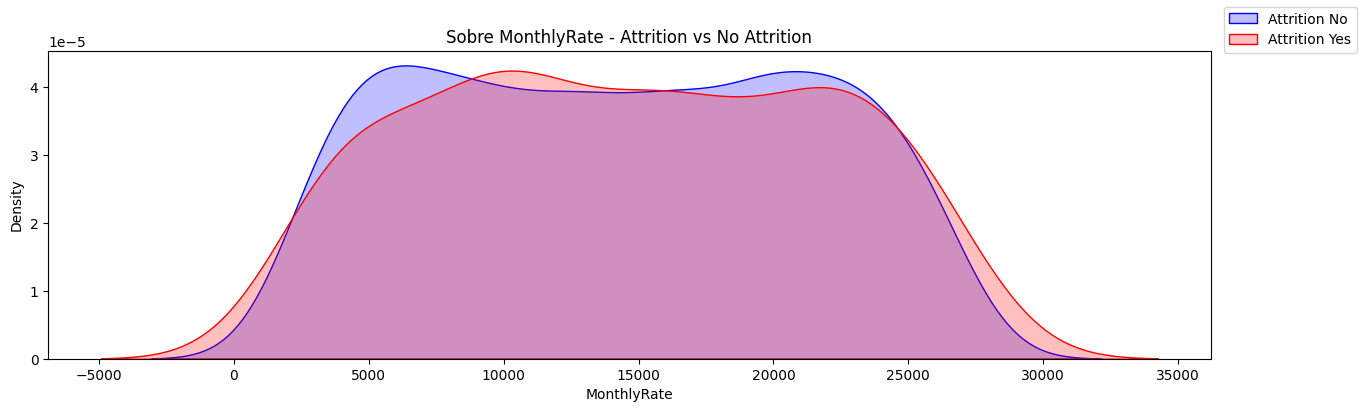

<Figure size 640x480 with 0 Axes>

In [115]:
fig = plt.figure(figsize=(15,4))

ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'No'),'MonthlyRate'] , color='b',fill=True,label='no Attrition')
ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'Yes'),'MonthlyRate'] , color='r',fill=True, label='Attrition')

fig.legend(labels=['Attrition No', 'Attrition Yes'])
plt.title('Sobre MonthlyRate - Attrition vs No Attrition')
plt.show()
plt.savefig('gráfica_MonthlyRate.pdf', dpi=fig.dpi)

## Número de compañías en las que ha trabajado (NumCompaniesWorked)

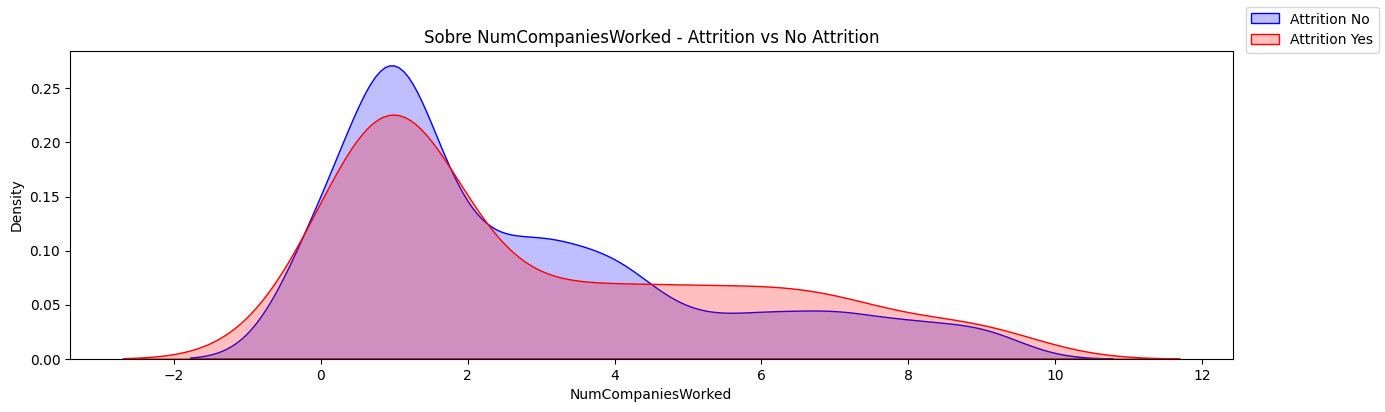

<Figure size 640x480 with 0 Axes>

In [116]:
fig = plt.figure(figsize=(15,4))

ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'No'),'NumCompaniesWorked'] , color='b',fill=True,label='no Attrition')
ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'Yes'),'NumCompaniesWorked'] , color='r',fill=True, label='Attrition')

fig.legend(labels=['Attrition No', 'Attrition Yes'])
plt.title('Sobre NumCompaniesWorked - Attrition vs No Attrition')
plt.show()
plt.savefig('gráfica_NumCompaniesWorked.pdf', dpi=fig.dpi)

## Porcentaje de aumento salarial (PercentSalaryHike)

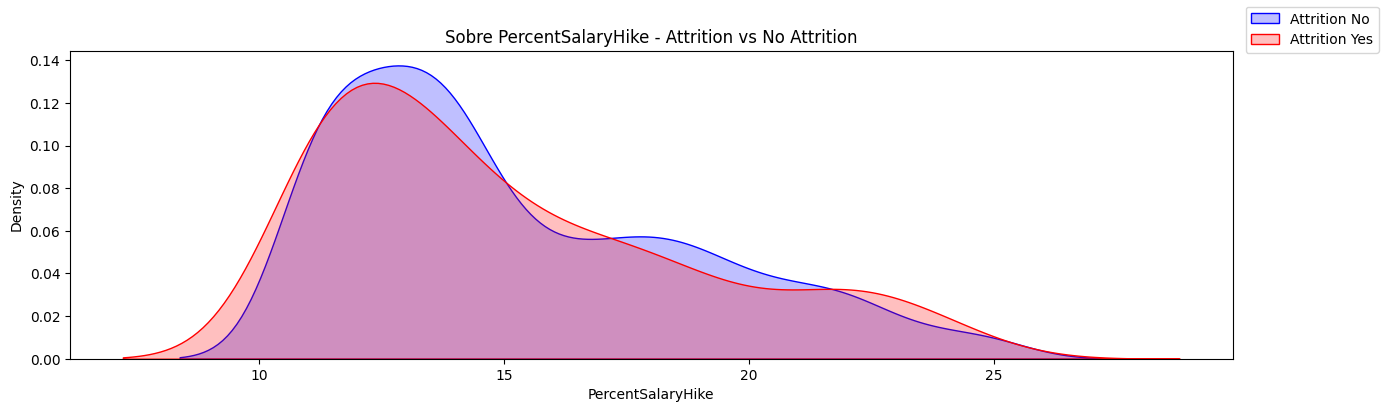

<Figure size 640x480 with 0 Axes>

In [117]:
fig = plt.figure(figsize=(15,4))

ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'No'),'PercentSalaryHike'] , color='b',fill=True,label='no Attrition')
ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'Yes'),'PercentSalaryHike'] , color='r',fill=True, label='Attrition')

fig.legend(labels=['Attrition No', 'Attrition Yes'])
plt.title('Sobre PercentSalaryHike - Attrition vs No Attrition')
plt.show()
plt.savefig('gráfica_PercentSalaryHike.pdf', dpi=fig.dpi)

## Calificación de desempeño del empleado (PerformanceRating)

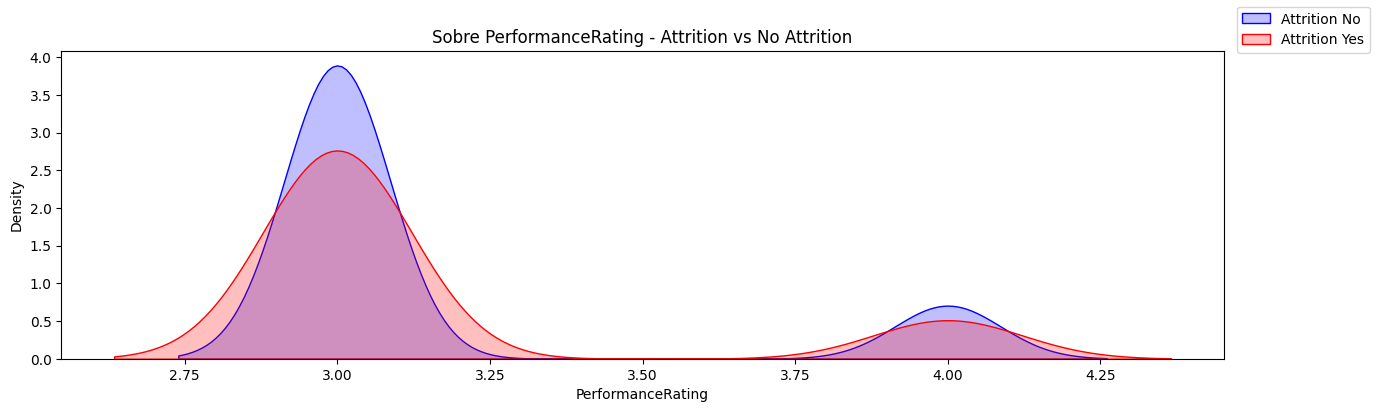

<Figure size 640x480 with 0 Axes>

In [118]:
fig = plt.figure(figsize=(15,4))

ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'No'),'PerformanceRating'] , color='b',fill=True,label='no Attrition')
ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'Yes'),'PerformanceRating'] , color='r',fill=True, label='Attrition')

fig.legend(labels=['Attrition No', 'Attrition Yes'])
plt.title('Sobre PerformanceRating - Attrition vs No Attrition')
plt.show()
plt.savefig('gráfica_PerformanceRating.pdf', dpi=fig.dpi)

## Satisfacción de la relación (RelationshipSatisfaction)

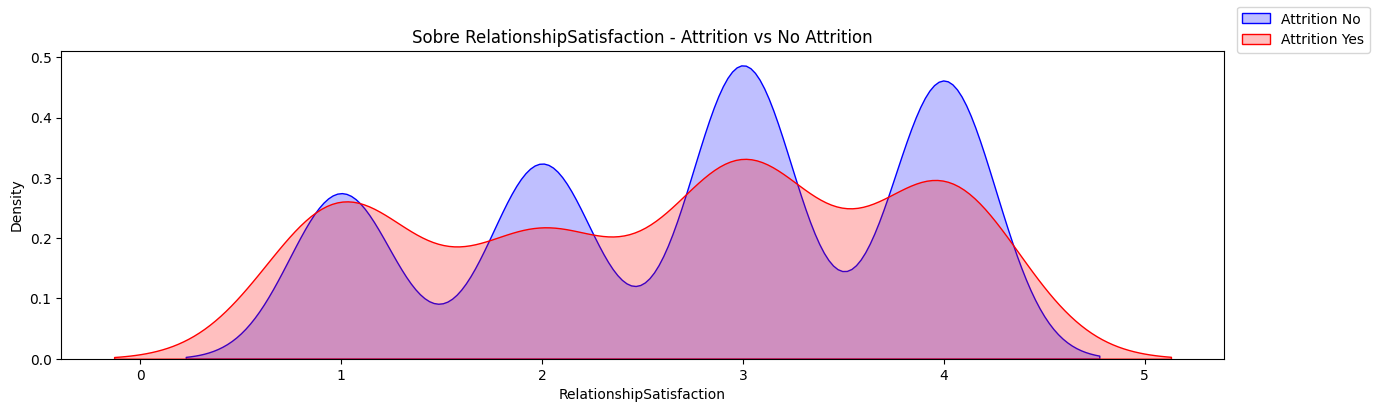

<Figure size 640x480 with 0 Axes>

In [119]:
fig = plt.figure(figsize=(15,4))

ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'No'),'RelationshipSatisfaction'] , color='b',fill=True,label='no Attrition')
ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'Yes'),'RelationshipSatisfaction'] , color='r',fill=True, label='Attrition')

fig.legend(labels=['Attrition No', 'Attrition Yes'])
plt.title('Sobre RelationshipSatisfaction - Attrition vs No Attrition')
plt.show()
plt.savefig('gráfica_RelationshipSatisfaction.pdf', dpi=fig.dpi)

## Nivel de opciones sobre acciones que se han otorgado al empleado(StockOptionLevel)

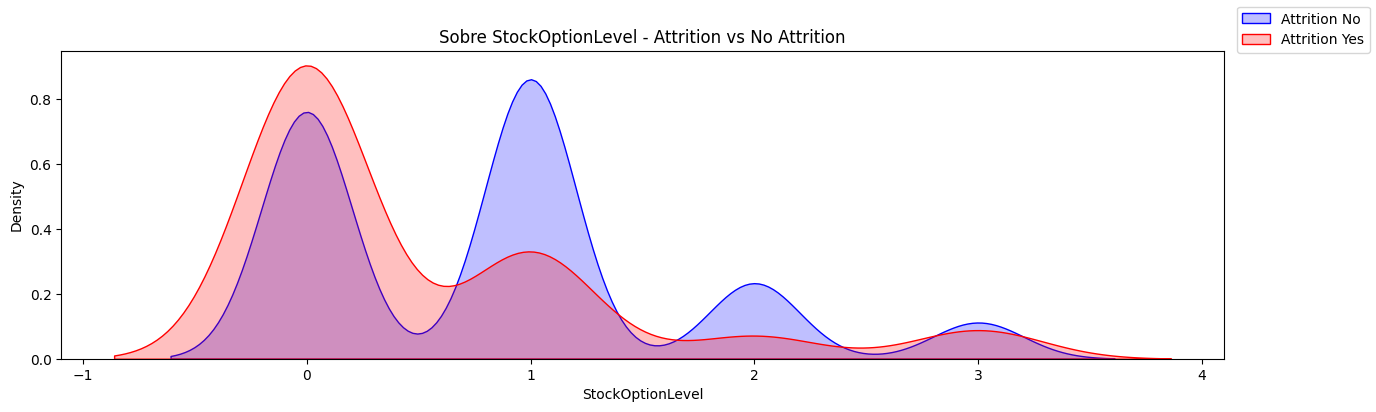

<Figure size 640x480 with 0 Axes>

In [120]:
fig = plt.figure(figsize=(15,4))

ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'No'),'StockOptionLevel'] , color='b',fill=True,label='no Attrition')
ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'Yes'),'StockOptionLevel'] , color='r',fill=True, label='Attrition')

fig.legend(labels=['Attrition No', 'Attrition Yes'])
plt.title('Sobre StockOptionLevel - Attrition vs No Attrition')
plt.show()
plt.savefig('gráfica_StockOptionLevel.pdf', dpi=fig.dpi)

## Número total de años trabajados (TotalWorkingYears)

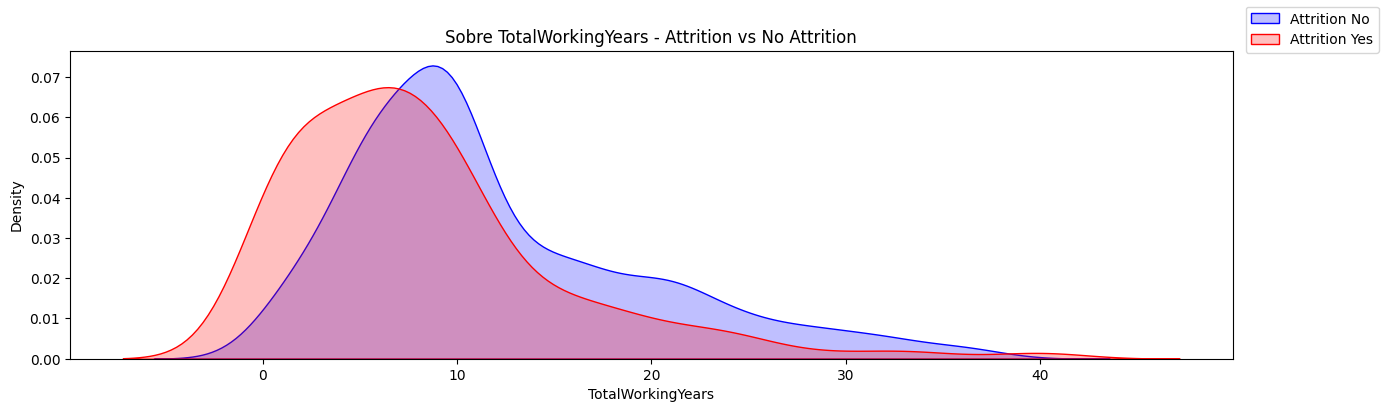

<Figure size 640x480 with 0 Axes>

In [121]:
fig = plt.figure(figsize=(15,4))

ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'No'),'TotalWorkingYears'] , color='b',fill=True,label='no Attrition')
ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'Yes'),'TotalWorkingYears'] , color='r',fill=True, label='Attrition')

fig.legend(labels=['Attrition No', 'Attrition Yes'])
plt.title('Sobre TotalWorkingYears - Attrition vs No Attrition')
plt.show()
plt.savefig('gráfica_TotalWorkingYears.pdf', dpi=fig.dpi)

## Número de veces que el empleado ha recibido formación en el último año(TrainingTimesLastYear)

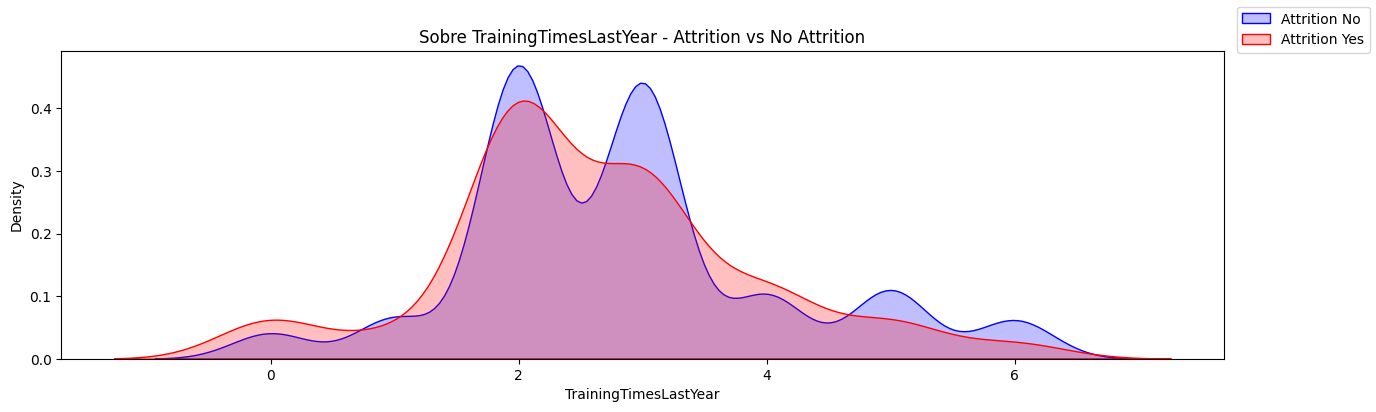

<Figure size 640x480 with 0 Axes>

In [122]:
fig = plt.figure(figsize=(15,4))

ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'No'),'TrainingTimesLastYear'] , color='b',fill=True,label='no Attrition')
ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'Yes'),'TrainingTimesLastYear'] , color='r',fill=True, label='Attrition')

fig.legend(labels=['Attrition No', 'Attrition Yes'])
plt.title('Sobre TrainingTimesLastYear - Attrition vs No Attrition')
plt.show()
plt.savefig('gráfica_TrainingTimesLastYear.pdf', dpi=fig.dpi)

## Equilibrio entre trabajo y vida personal (WorkLifeBalance)

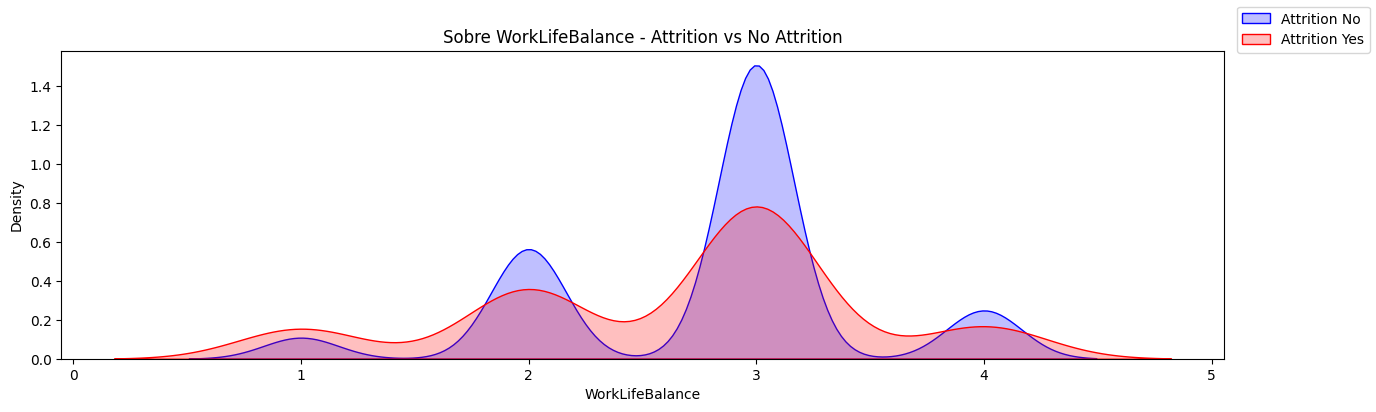

<Figure size 640x480 with 0 Axes>

In [123]:
fig = plt.figure(figsize=(15,4))

ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'No'),'WorkLifeBalance'] , color='b',fill=True,label='no Attrition')
ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'Yes'),'WorkLifeBalance'] , color='r',fill=True, label='Attrition')

fig.legend(labels=['Attrition No', 'Attrition Yes'])
plt.title('Sobre WorkLifeBalance - Attrition vs No Attrition')
plt.show()
plt.savefig('gráfica_WorkLifeBalance.pdf', dpi=fig.dpi)

## Años en la compañía (YearsAtCompany)

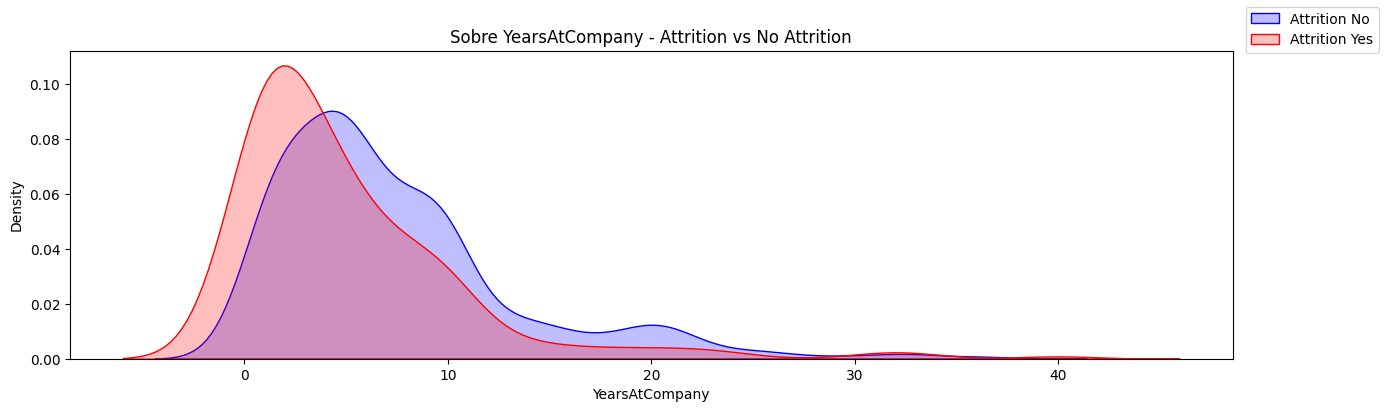

<Figure size 640x480 with 0 Axes>

In [124]:
fig = plt.figure(figsize=(15,4))

ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'No'),'YearsAtCompany'] , color='b',fill=True,label='no Attrition')
ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'Yes'),'YearsAtCompany'] , color='r',fill=True, label='Attrition')

fig.legend(labels=['Attrition No', 'Attrition Yes'])
plt.title('Sobre YearsAtCompany - Attrition vs No Attrition')
plt.show()
plt.savefig('gráfica_YearsAtCompany.pdf', dpi=fig.dpi)

## Años en rol actual (YearsInCurrentRole)

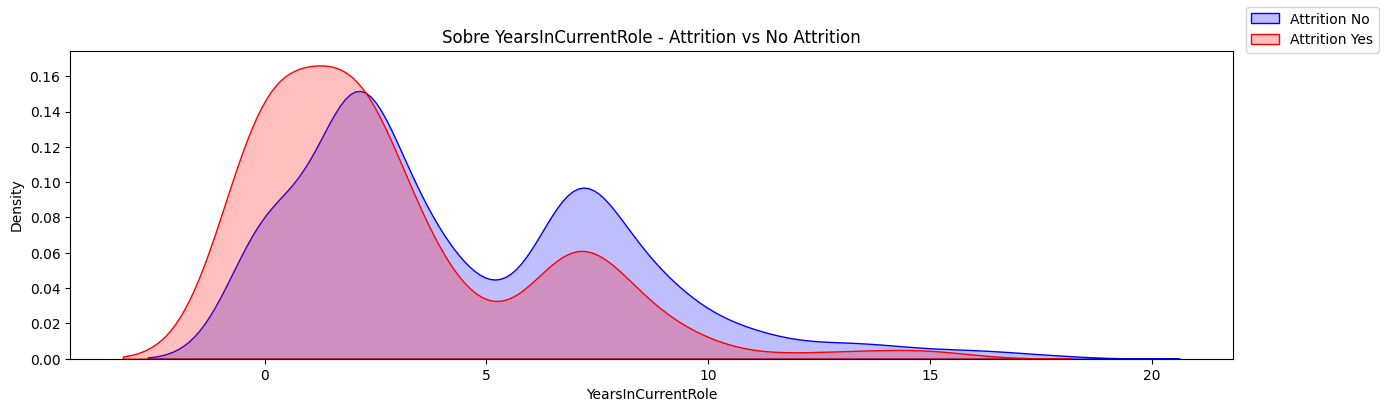

<Figure size 640x480 with 0 Axes>

In [125]:
fig = plt.figure(figsize=(15,4))

ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'No'),'YearsInCurrentRole'] , color='b',fill=True,label='no Attrition')
ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'Yes'),'YearsInCurrentRole'] , color='r',fill=True, label='Attrition')

fig.legend(labels=['Attrition No', 'Attrition Yes'])
plt.title('Sobre YearsInCurrentRole - Attrition vs No Attrition')
plt.show()
plt.savefig('gráfica_YearsInCurrentRole.pdf', dpi=fig.dpi)

## Años desde el último ascenso (YearsSinceLastPromotion)

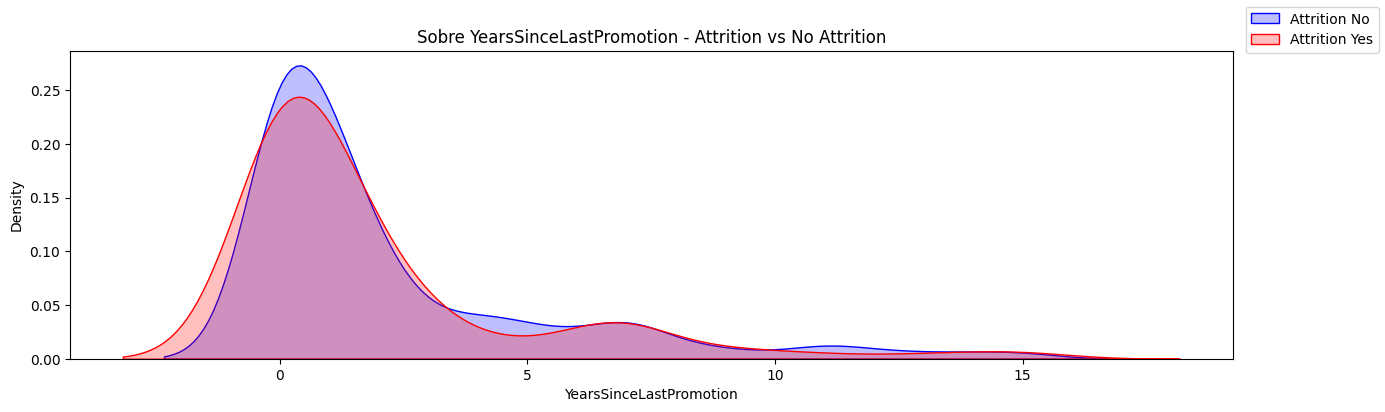

<Figure size 640x480 with 0 Axes>

In [126]:
fig = plt.figure(figsize=(15,4))

ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'No'),'YearsSinceLastPromotion'] , color='b',fill=True,label='no Attrition')
ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'Yes'),'YearsSinceLastPromotion'] , color='r',fill=True, label='Attrition')

fig.legend(labels=['Attrition No', 'Attrition Yes'])
plt.title('Sobre YearsSinceLastPromotion - Attrition vs No Attrition')
plt.show()
plt.savefig('gráfica_YearsSinceLastPromotion.pdf', dpi=fig.dpi)

## Años con el actual jefe (YearsWithCurrManager)

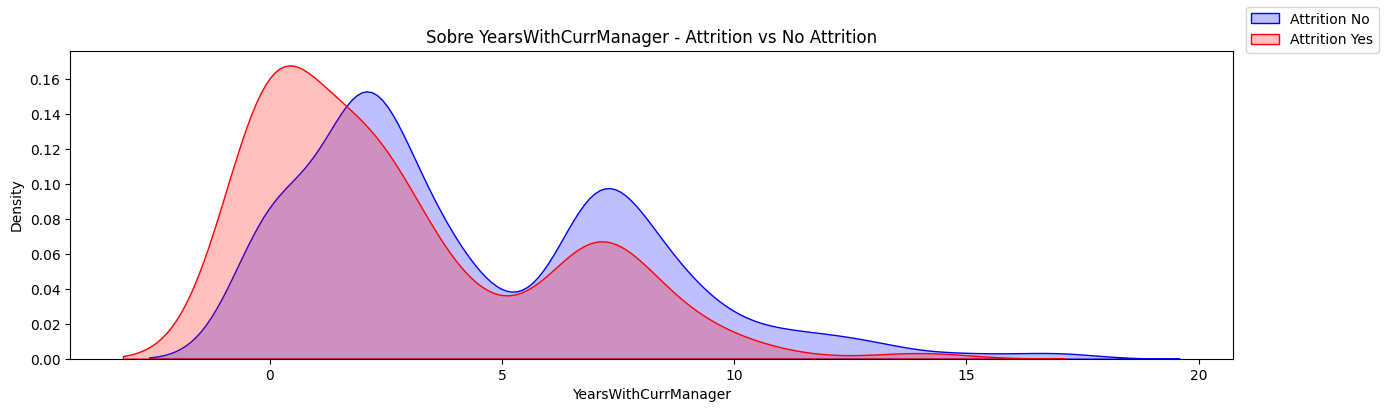

<Figure size 640x480 with 0 Axes>

In [127]:
fig = plt.figure(figsize=(15,4))

ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'No'),'YearsWithCurrManager'] , color='b',fill=True,label='no Attrition')
ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'Yes'),'YearsWithCurrManager'] , color='r',fill=True, label='Attrition')

fig.legend(labels=['Attrition No', 'Attrition Yes'])
plt.title('Sobre YearsWithCurrManager - Attrition vs No Attrition')
plt.show()
plt.savefig('gráfica_YearsWithCurrManager.pdf', dpi=fig.dpi)

# Mapa de correlación

<ipython-input-128-aee2d1a62057>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = datos.corr()


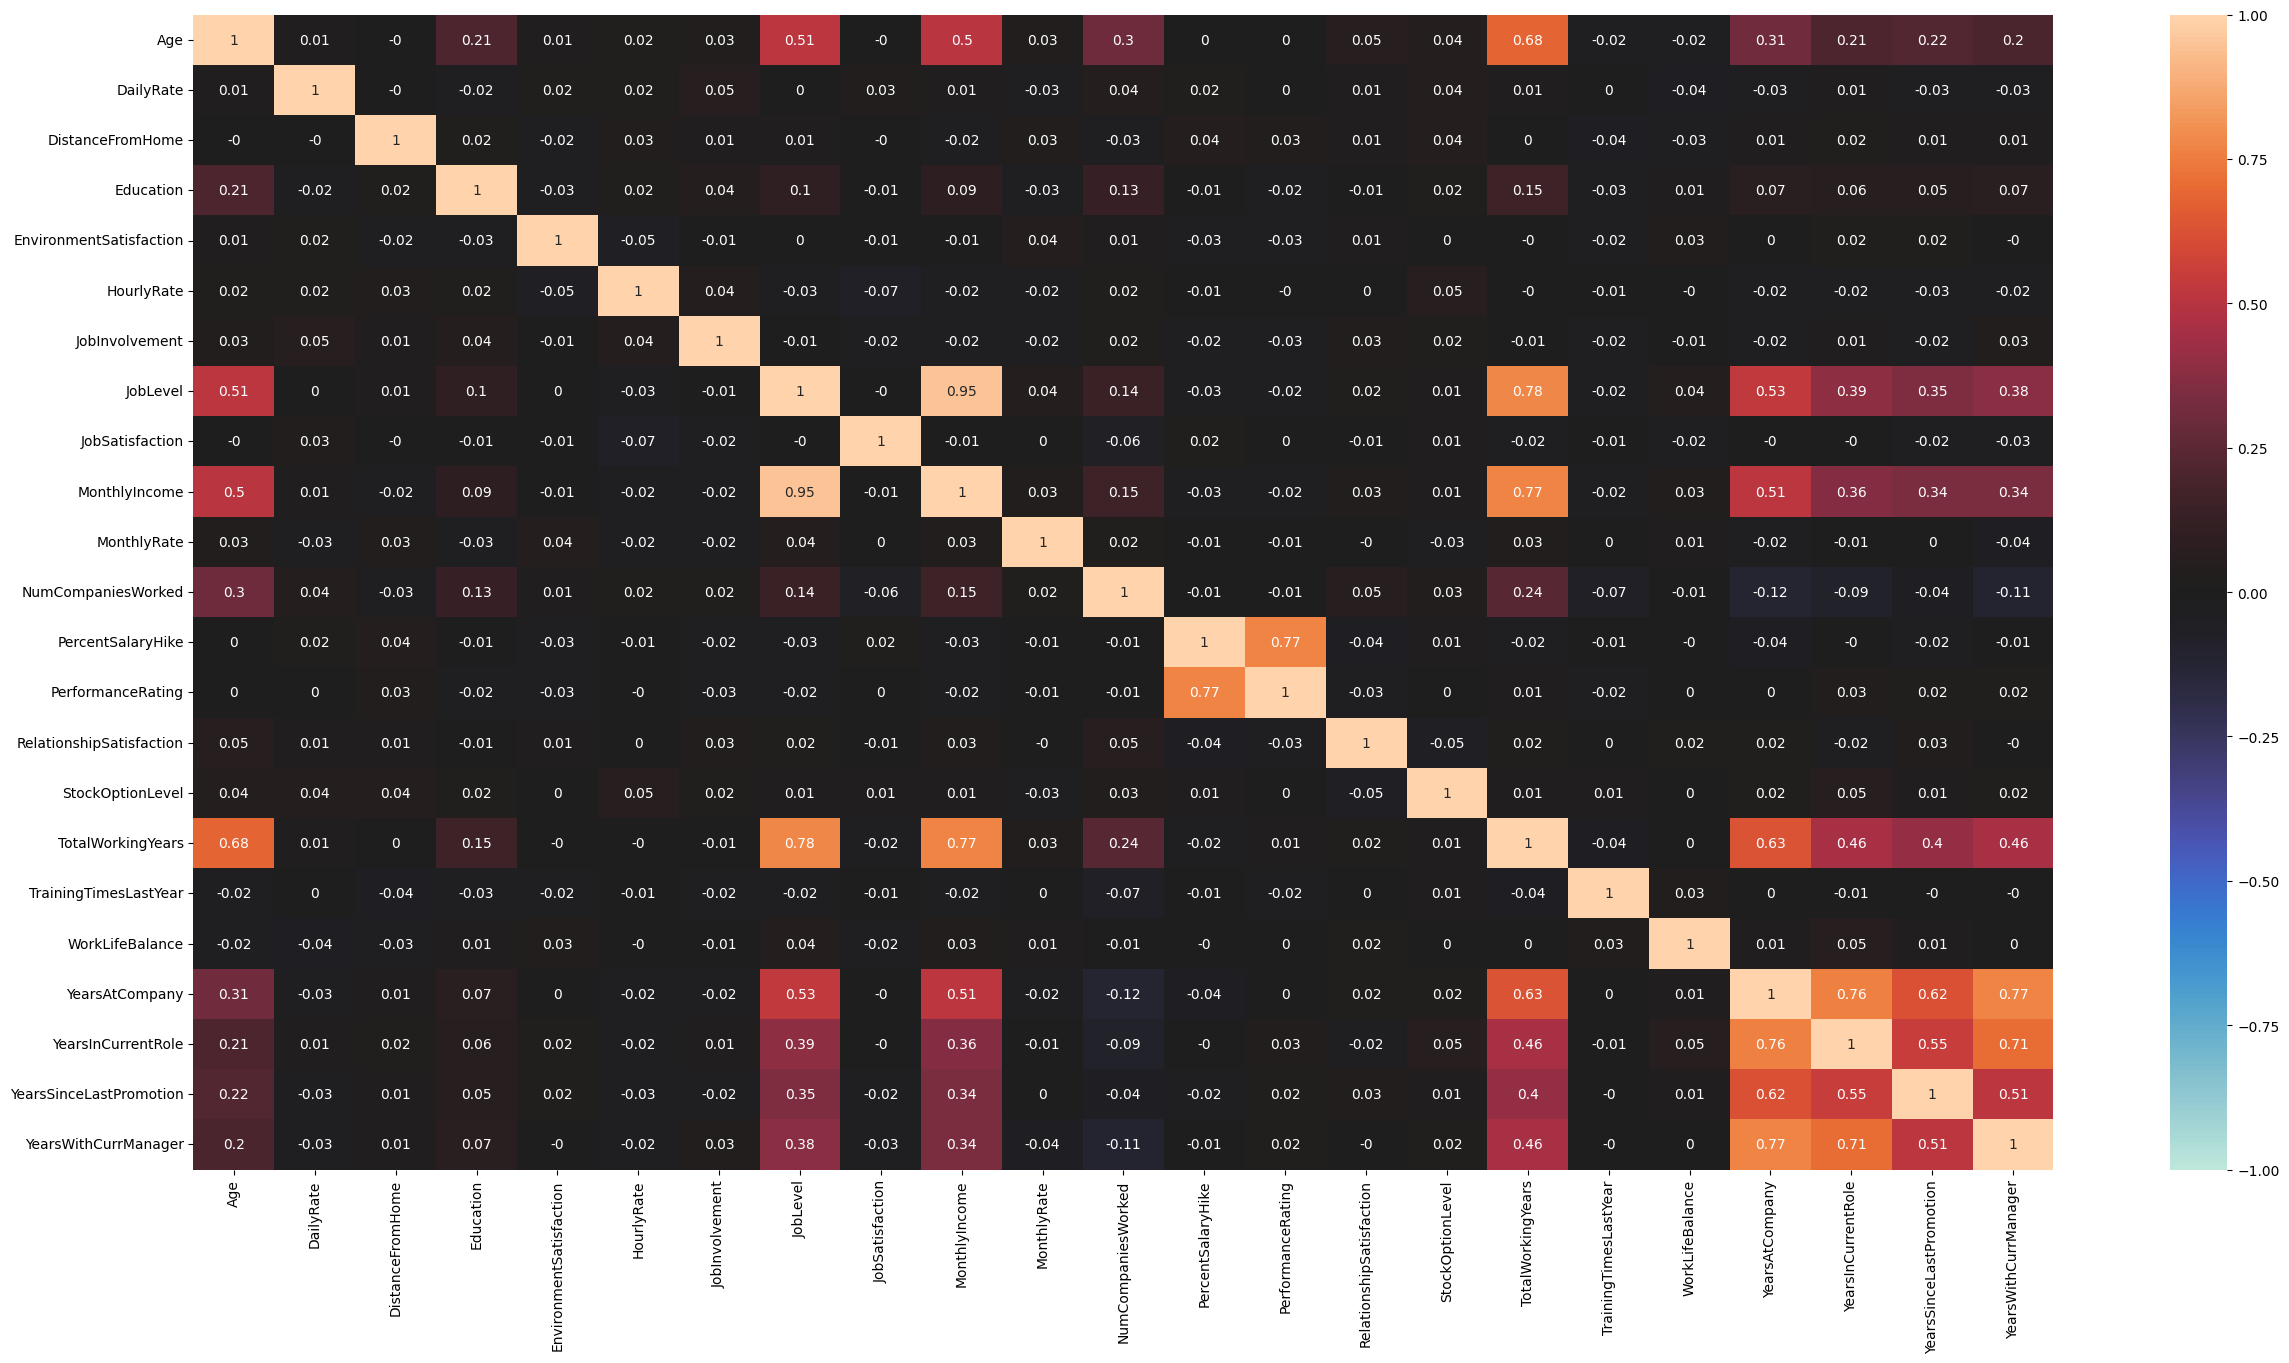

In [128]:
fig = plt.figure(figsize=(30,15))
corr = datos.corr()
sns.heatmap(round(corr,2), vmin=-1, center=0, vmax=1, annot=True);
plt.savefig('temp.pdf', dpi=fig.dpi)

Podríamos considerar tratar las varibales de YearsAtCompany, YearsWithCurrentCrole.. ya que podemos observar que tienen una cierta correlación directa.

# Preprocesamiento de datos

In [129]:
datos

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                    1          2  Life Sciences                        2   
1                    8          1  Life Sciences                        3   
2                    2          2          Other                        4   
3                    3          4  Life Sciences                        4   
4                    2          1        Medical                        1   
...                ...        ...            ...                      ...   
1465                23          2        Medical                        3   
1466                 6          1        Medical                        4   
1467                 4          3  Life Sciences                        2   
1468                 2          3        Medical                        4   
1469                 8          3        Medical                        2   

      Gender  HourlyRate  JobInvolvement  JobLevel                    JobRole  \
0     Female          94               3         2            Sales Executive   
1       Male          61               2         2         Research Scientist   
2       Male          92               2         1      Laboratory Technician   
3     Female          56               3         1         Research Scientist   
4       Male          40               3         1      Laboratory Technician   
...      ...         ...             ...       ...                        ...   
1465    Male          41               4         2      Laboratory Technician   
1466    Male          42               2         3  Healthcare Representative   
1467    Male          87               4         2     Manufacturing Director   
1468    Male          63               2         2            Sales Executive   
1469    Male          82               4         2      Laboratory Technician   

      JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  \
0                   4        Single           5993        19479   
1                   2       Married           5130        24907   
2                   3        Single           2090         2396   
3                   3       Married           2909        23159   
4                   2       Married           3468        16632   
...               ...           ...            ...          ...   
1465                4       Married           2571        12290   
1466                1       Married           9991        21457   
1467                2       Married           6142         5174   
1468                2       Married           5390        13243   
1469                3       Married           4404        10228   

      NumCompaniesWorked OverTime  PercentSalaryHike  PerformanceRating  \
0                      8      Yes                 11                  3   
1                      1       No                 23                  4   
2                      6      Yes                 15                  3   
3                      1      Yes                 11                  3   
4  

In [130]:
datos['Attrition'] = datos['Attrition'].replace({'No': 0, 'Yes': 1})
datos['Gender'] = datos['Gender'].replace({'Female': 0, 'Male': 1})
datos['OverTime'] = datos['OverTime'].replace({'No': 0, 'Yes': 1})

# Seleccionamos solo las columnas categóricas que nos interesan
datos = pd.get_dummies(datos, columns=['Education','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction','PerformanceRating',
                                       'RelationshipSatisfaction','StockOptionLevel','WorkLifeBalance','Department', 
                                       'EducationField', 'JobRole', 'MaritalStatus','BusinessTravel'])


# Mostramos el resultado
datos

Age  Attrition  DailyRate  DistanceFromHome  Gender  HourlyRate  \
0      41          1       1102                 1       0          94   
1      49          0        279                 8       1          61   
2      37          1       1373                 2       1          92   
3      33          0       1392                 3       0          56   
4      27          0        591                 2       1          40   
...   ...        ...        ...               ...     ...         ...   
1465   36          0        884                23       1          41   
1466   39          0        613                 6       1          42   
1467   27          0        155                 4       1          87   
1468   49          0       1023                 2       1          63   
1469   34          0        628                 8       1          82   

      MonthlyIncome  MonthlyRate  NumCompaniesWorked  OverTime  \
0              5993        19479                   8         1   
1              5130        24907                   1         0   
2              2090         2396                   6         1   
3              2909        23159                   1         1   
4              3468        16632                   9         0   
...             ...          ...                 ...       ...   
1465           2571        12290                   4         0   
1466           9991        21457                   4         0   
1467           6142         5174                   1         1   
1468           5390        13243                   2         0   
1469           4404        10228                   2         0   

      PercentSalaryHike  TotalWorkingYears  TrainingTimesLastYear  \
0                    11                  8                      0   
1                    23                 10                      3   
2                    15                  7                      3   
3                    11                  8                      3   
4                    12                  6                      3   
...                 ...                ...                    ...   
1465                 17                 17                      3   
1466                 15                  9                      5   
1467                 20                  6                      0   
1468                 14                 17                      3   
1469                 12                  6                      3   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                  6                   4                        0   
1                 10                   7                        1   
2                  0                   0                        0   
3                  8                   7                        3   
4                  2                   2                        2   
...              ...                 ...                      ...   
1465               5                   2                        0   
1466               7                   7                        1   
1467               6                   2                        0   
1468               9                   6                        0   
1469               4                   3                        1   

      YearsWithCurrManager  Education_1  Education_2  Education_3  \
0                        5            0            1            0   
1                        7            1            0            0   
2                        0            0            1            0   
3                        0            0            0            0   
4                        2            1            0            0   
...                    ...          ...          ...          ...   
1465                     3            0            1            0   
1466                     7            1            0            0   
1467                     3            0            0     

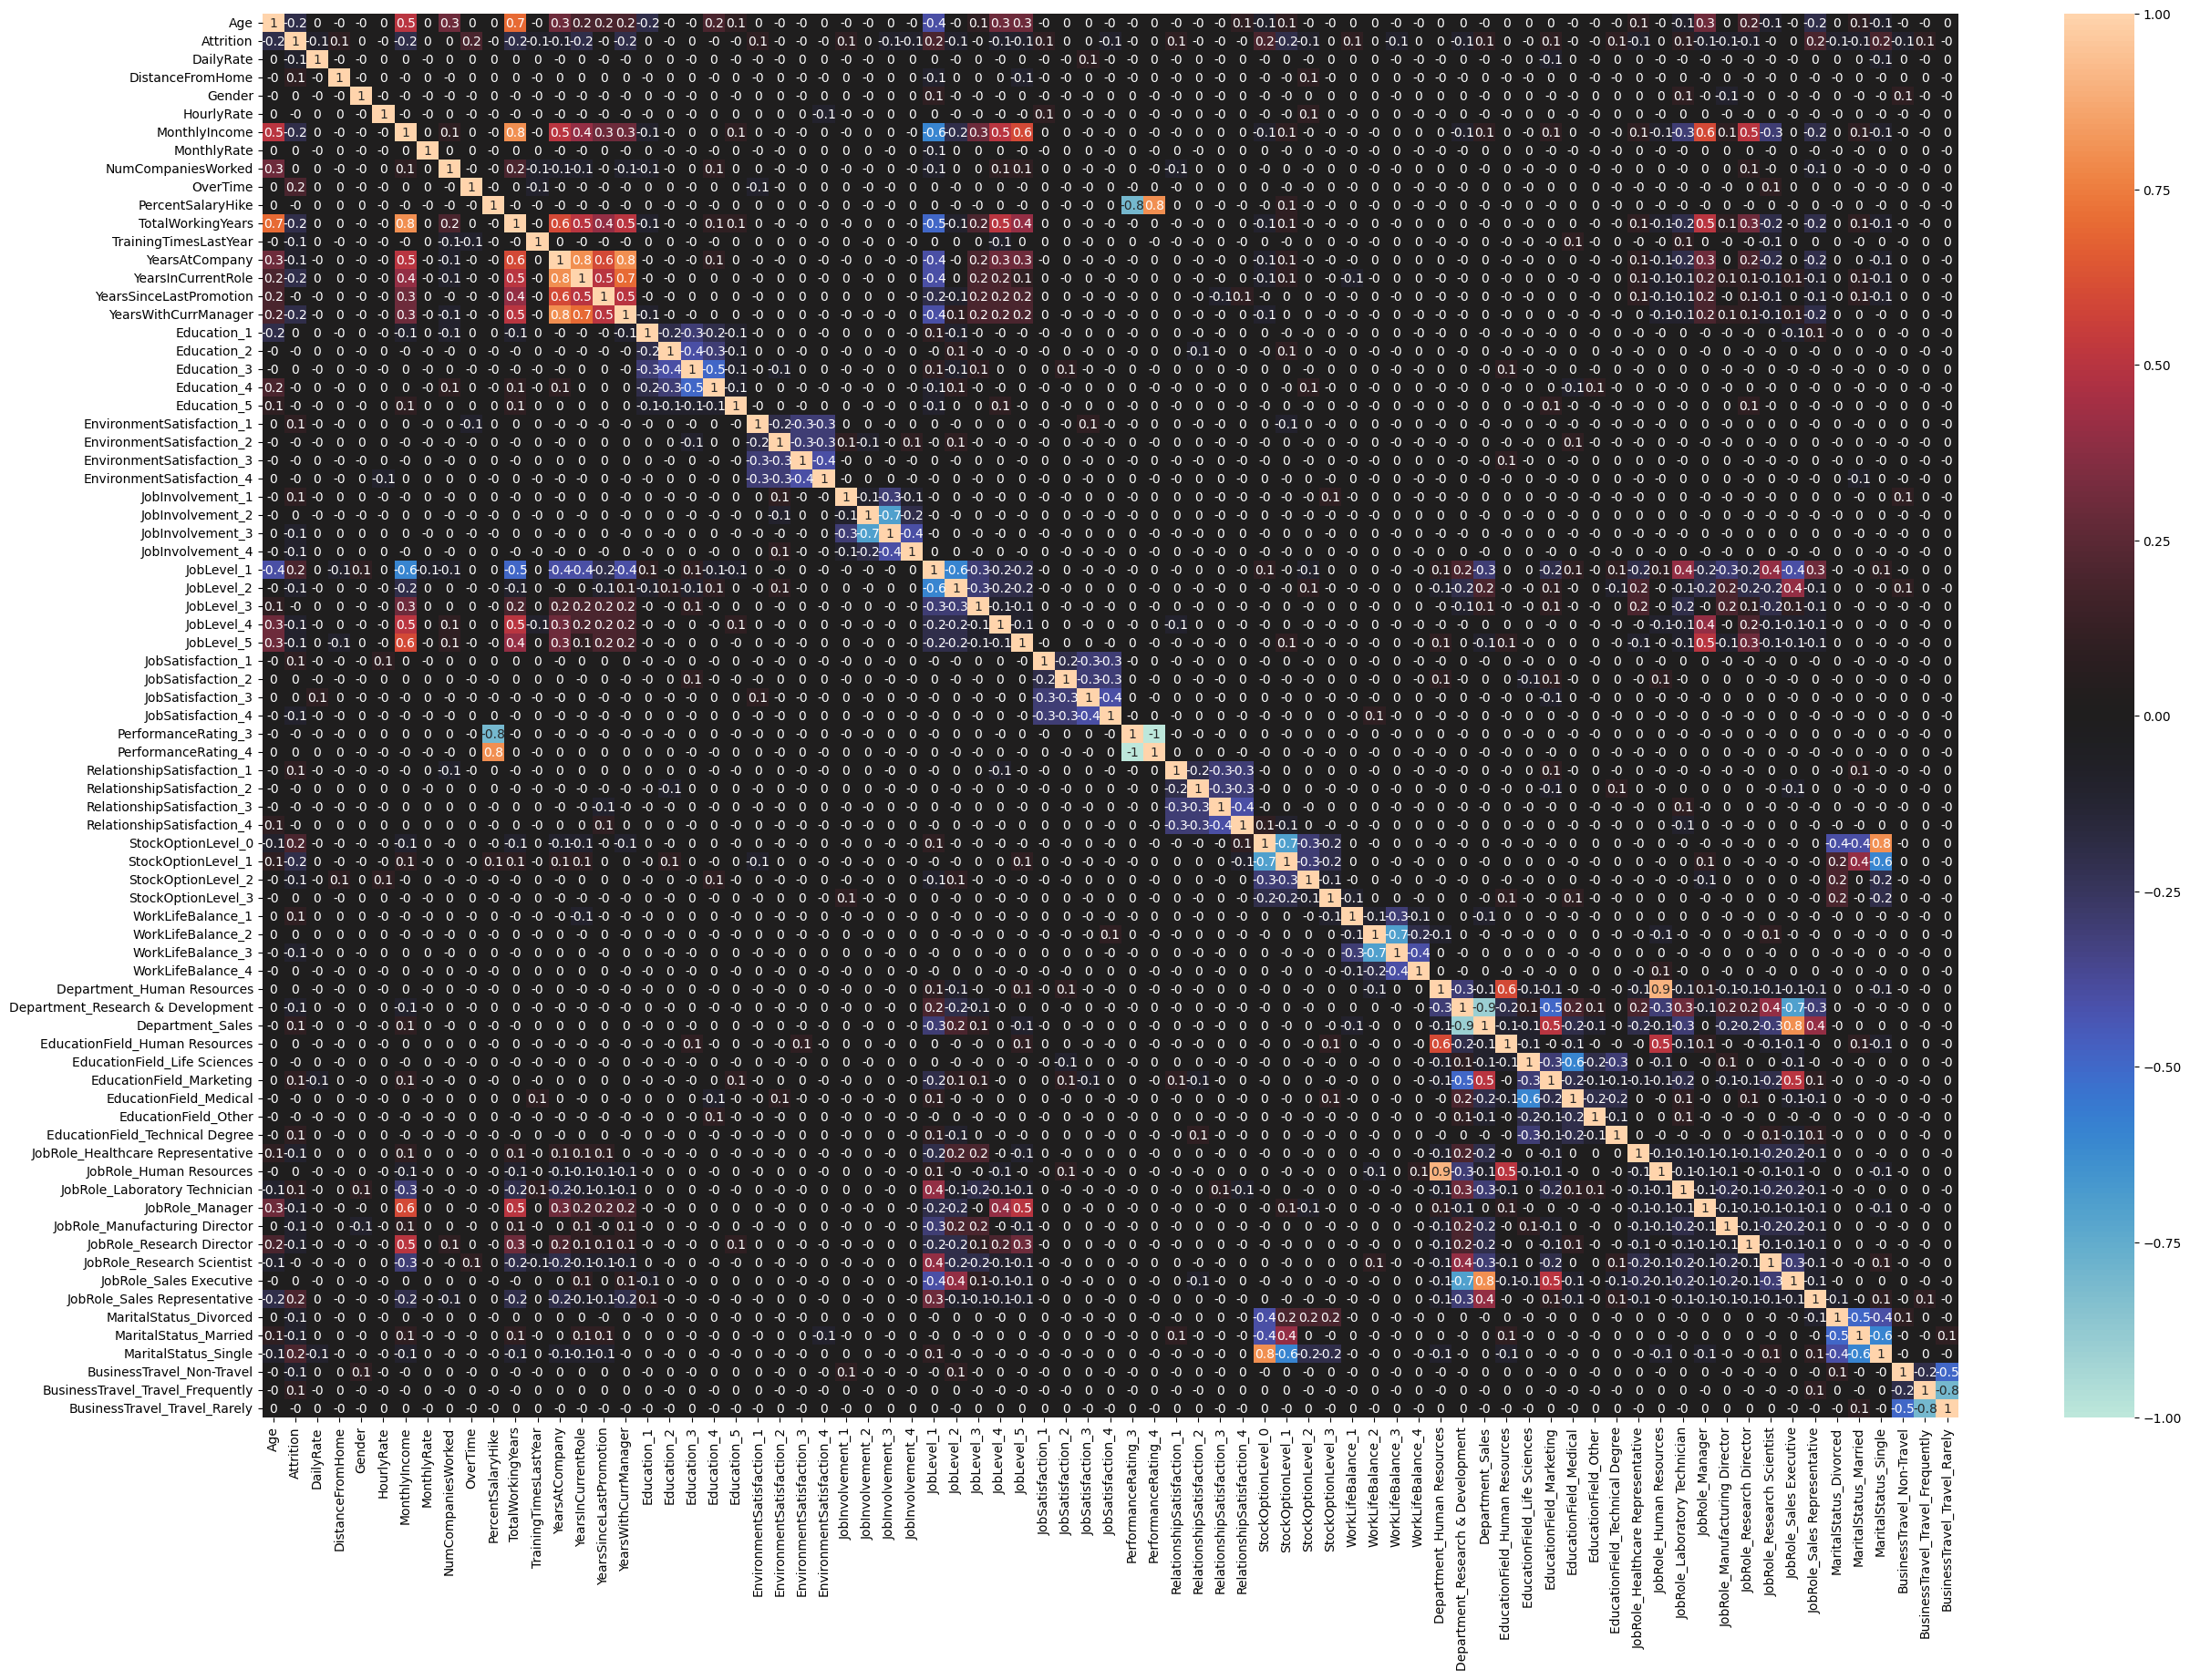

In [131]:
fig = plt.figure(figsize=(30,20))
corr = datos.corr()
sns.heatmap(round(corr,1), vmin=-1, center=0, vmax=1, annot=True);

In [132]:
X = datos.drop('Attrition', axis=1)
y = datos['Attrition']

In [133]:
X

Age  DailyRate  DistanceFromHome  Gender  HourlyRate  MonthlyIncome  \
0      41       1102                 1       0          94           5993   
1      49        279                 8       1          61           5130   
2      37       1373                 2       1          92           2090   
3      33       1392                 3       0          56           2909   
4      27        591                 2       1          40           3468   
...   ...        ...               ...     ...         ...            ...   
1465   36        884                23       1          41           2571   
1466   39        613                 6       1          42           9991   
1467   27        155                 4       1          87           6142   
1468   49       1023                 2       1          63           5390   
1469   34        628                 8       1          82           4404   

      MonthlyRate  NumCompaniesWorked  OverTime  PercentSalaryHike  \
0           19479                   8         1                 11   
1           24907                   1         0                 23   
2            2396                   6         1                 15   
3           23159                   1         1                 11   
4           16632                   9         0                 12   
...           ...                 ...       ...                ...   
1465        12290                   4         0                 17   
1466        21457                   4         0                 15   
1467         5174                   1         1                 20   
1468        13243                   2         0                 14   
1469        10228                   2         0                 12   

      TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
0                     8                      0               6   
1                    10                      3              10   
2                     7                      3               0   
3                     8                      3               8   
4                     6                      3               2   
...                 ...                    ...             ...   
1465                 17                      3               5   
1466                  9                      5               7   
1467                  6                      0               6   
1468                 17                      3               9   
1469                  6                      3               4   

      YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  \
0                      4                        0                     5   
1                      7                        1                     7   
2                      0                        0                     0   
3                      7                        3                     0   
4                      2                        2                     2   
...                  ...                      ...                   ...   
1465                   2                        0                     3   
1466                   7                        1                     7   
1467                   2                        0                     3   
1468                   6                        0                     8   
1469                   3                        1                     2   

      Education_1  Education_2  Education_3  Education_4  Education_5  \
0               0            1            0            0            0   
1               1            0            0            0            0   
2               0            1            0            0            0   
3               0            0            0            1            0   
4               1            0            0            0            0   
...           ...          ...          ...          ...          ...   
1465            0            1     

In [134]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [136]:
X_train

Age  DailyRate  DistanceFromHome  Gender  HourlyRate  MonthlyIncome  \
1097   24        350                21       1          57           2296   
727    18        287                 5       1          73           1051   
254    29       1247                20       1          45           6931   
1175   39        492                12       1          66           5295   
1341   31        311                20       1          89           4197   
...   ...        ...               ...     ...         ...            ...   
1130   35        750                28       1          46           3407   
1294   41        447                 5       1          85           6870   
860    22       1256                 3       1          48           2853   
1459   29       1378                13       1          46           4025   
1126   50        264                 9       1          59          19331   

      MonthlyRate  NumCompaniesWorked  OverTime  PercentSalaryHike  \
1097        10036                   0         0                 14   
727         13493                   1         0                 15   
254         10732                   2         0                 14   
1175         7693                   4         0                 21   
1341        18624                   1         0                 11   
...           ...                 ...       ...                ...   
1130        25348                   1         0                 17   
1294        15530                   3         0                 12   
860          4223                   0         1                 11   
1459        23679                   4         1                 13   
1126        19519                   4         1                 16   

      TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
1097                  2                      3               1   
727                   0                      2               0   
254                  10                      2               3   
1175                  7                      3               5   
1341                 10                      2              10   
...                 ...                    ...             ...   
1130                 10                      3              10   
1294                 11                      3               3   
860                   1                      5               0   
1459                 10                      2               4   
1126                 27                      2               1   

      YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  \
1097                   1                        0                     0   
727                    0                        0                     0   
254                    2                        0                     2   
1175                   4                        1                     0   
1341                   8                        0                     2   
...                  ...                      ...                   ...   
1130                   9                        6                     8   
1294                   2                        1                     2   
860                    0                        0                     0   
1459                   3                        0                     3   
1126                   0                        0                     0   

      Education_1  Education_2  Education_3  Education_4  Education_5  \
1097            0            1            0            0            0   
727             0            1            0            0            0   
254             0            1            0            0            0   
1175            0            0            1            0            0   
1341            0            0            1            0            0   
...           ...          ...          ...          ...          ...   
1130            0            0     

In [137]:
col_scaled = ['DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate']

In [138]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[col_scaled])
X_test_scaled = scaler.transform(X_test[col_scaled])

X_train[col_scaled] = X_train_scaled
X_test[col_scaled] = X_test_scaled
X_train

Age  DailyRate  DistanceFromHome  Gender  HourlyRate  MonthlyIncome  \
1097   24  -1.108139                21       1   -0.472832      -0.868277   
727    18  -1.263481                 5       1    0.309374      -1.132807   
254    29   1.103647                20       1   -1.059487       0.116537   
1175   39  -0.758001                12       1   -0.032841      -0.231070   
1341   31  -1.204303                20       1    1.091580      -0.464366   
...   ...        ...               ...     ...         ...            ...   
1130   35  -0.121835                28       1   -1.010599      -0.632220   
1294   41  -0.868960                 5       1    0.896028       0.103576   
860    22   1.125839                 3       1   -0.912823      -0.749930   
1459   29   1.426662                13       1   -1.010599      -0.500911   
1126   50  -1.320194                 9       1   -0.375056       2.751206   

      MonthlyRate  NumCompaniesWorked  OverTime  PercentSalaryHike  \
1097    -0.601895                   0         0                 14   
727     -0.115318                   1         0                 15   
254     -0.503933                   2         0                 14   
1175    -0.931675                   4         0                 21   
1341     0.606876                   1         0                 11   
...           ...                 ...       ...                ...   
1130     1.553287                   1         0                 17   
1294     0.171392                   3         0                 12   
860     -1.420082                   0         1                 11   
1459     1.318373                   4         1                 13   
1126     0.732848                   4         1                 16   

      TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
1097                  2                      3               1   
727                   0                      2               0   
254                  10                      2               3   
1175                  7                      3               5   
1341                 10                      2              10   
...                 ...                    ...             ...   
1130                 10                      3              10   
1294                 11                      3               3   
860                   1                      5               0   
1459                 10                      2               4   
1126                 27                      2               1   

      YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  \
1097                   1                        0                     0   
727                    0                        0                     0   
254                    2                        0                     2   
1175                   4                        1                     0   
1341                   8                        0                     2   
...                  ...                      ...                   ...   
1130                   9                        6                     8   
1294                   2                        1                     2   
860                    0                        0                     0   
1459                   3                        0                     3   
1126                   0                        0                     0   

      Education_1  Education_2  Education_3  Education_4  Education_5  \
1097            0            1            0            0            0   
727             0            1            0            0            0   
254             0            1            0            0            0   
1175            0            0            1            0            0   
1341            0            0            1            0            0   
...           ...          ...          ...          ...          ...   
1130            0            0     

In [139]:
# Creamos una instancia de RandomUnderSampler
rus = RandomUnderSampler()

# Submuestreamos los datos de entrenamiento
X_underResampled, y_underResampled = rus.fit_resample(X_train, y_train)

counter = Counter(y_underResampled)
print(counter)

Counter({0: 198, 1: 198})


In [140]:
# Creamos una instancia de RandomUnderSampler
ros = RandomOverSampler()

# Sobremuestreamos los datos de entrenamiento
X_overResampled, y_overResampled = ros.fit_resample(X_train, y_train)
X_overResampled.shape
y_overResampled.shape

counter = Counter(y_overResampled)
print(counter)

Counter({0: 978, 1: 978})


In [141]:
clf = LogisticRegression()

solvers = list(['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'])
intercept =  [True, False]
multi_classes = list(['auto', 'ovr', 'multinomial'])

param_grid = dict(solver =solvers, multi_class=multi_classes, fit_intercept= intercept)

grid_search = GridSearchCV(clf, param_grid, cv=5)

grid_search.fit(X_train, y_train)

print('Mejores hiperparámetros:', grid_search.best_params_)
print('Puntuación de validación cruzada:', grid_search.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Mejores hiperparámetros: {'fit_intercept': True, 'multi_class': 'multinomial', 'solver': 'sag'}
Puntuación de validación cruzada: 0.8784132708258203


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


              precision    recall  f1-score   support

           0       0.96      0.91      0.94       270
           1       0.38      0.62      0.48        24

    accuracy                           0.89       294
   macro avg       0.67      0.77      0.71       294
weighted avg       0.92      0.89      0.90       294

[[246   9]
 [ 24  15]]


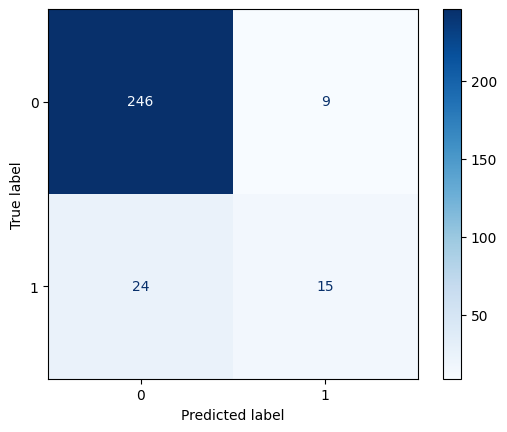

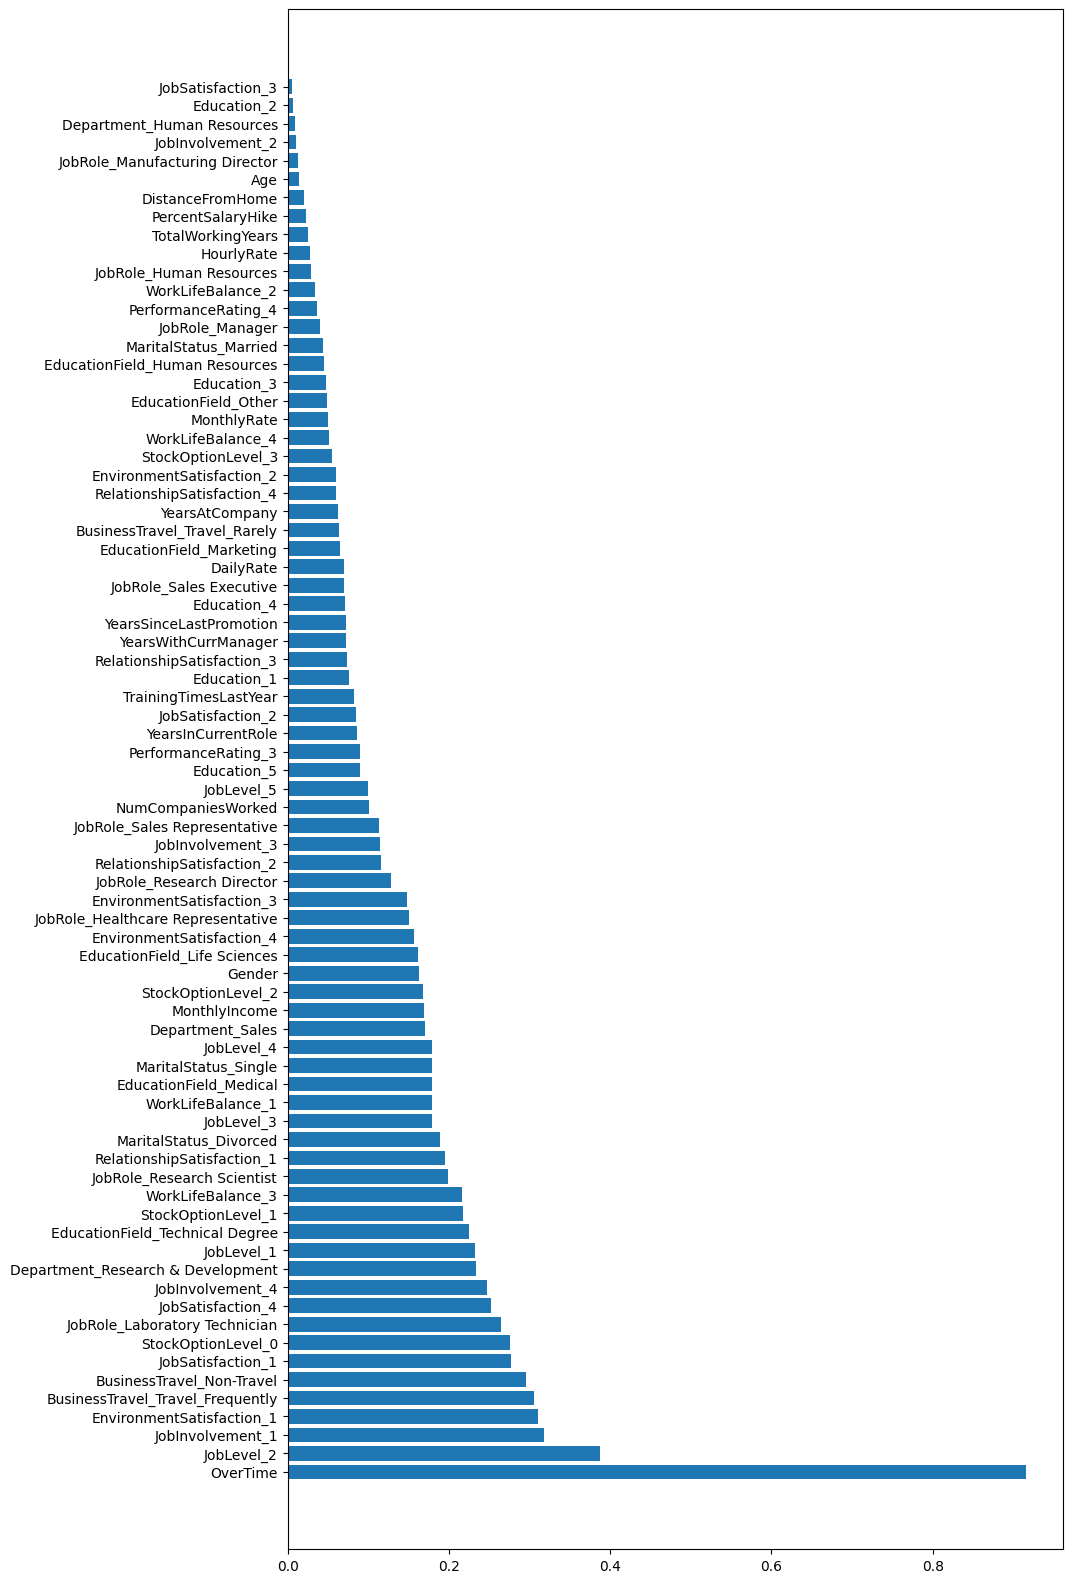

In [142]:
clf = LogisticRegression(fit_intercept=True, multi_class= 'multinomial', solver= 'sag')

clf.fit(X_train, y_train)
clf_prd = clf.predict(X_test)

print(classification_report(clf_prd, y_test))

disp = ConfusionMatrixDisplay.from_estimator(
clf,
X_test,
y_test,
cmap=plt.cm.Blues
)
print(disp.confusion_matrix)

coefs = np.abs(clf.coef_)[0]
indices = np.argsort(coefs)[::-1]
feature_names = X_train.columns
sorted_feature_names = feature_names[indices]
plt.figure(figsize=(10,20))
plt.barh(range(len(coefs)), coefs[indices])
plt.yticks(range(len(coefs)), sorted_feature_names)
plt.show()

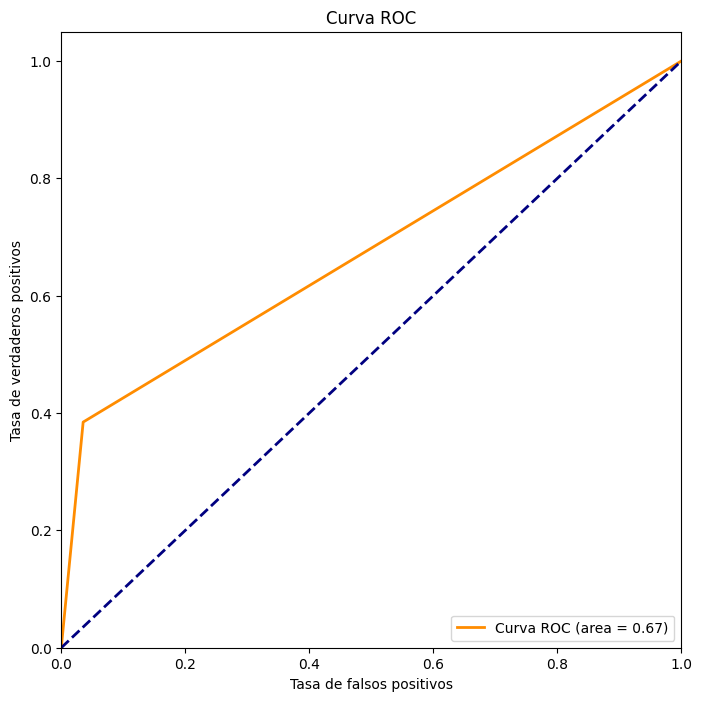

In [143]:
# Calcular la curva ROC y el AUC
fpr, tpr, thresholds = roc_curve(y_test, clf_prd)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

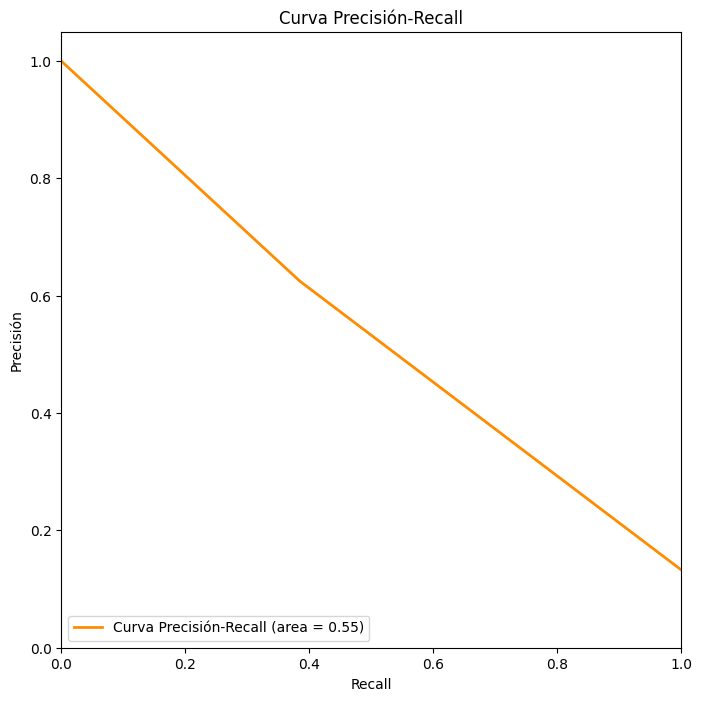

In [144]:
precision, recall, thresholds = precision_recall_curve(y_test, clf_prd)
pr_auc = auc(recall, precision)

# Graficar la curva de precisión-recall
plt.figure(figsize=(8,8))
plt.plot(recall, precision, color='darkorange', lw=2, label='Curva Precisión-Recall (area = %0.2f)' % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precisión')
plt.title('Curva Precisión-Recall')
plt.legend(loc="lower left")
plt.show()

In [145]:
clf = LogisticRegression()

solvers = list(['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'])
intercept =  [True, False]
multi_classes = list(['auto', 'ovr', 'multinomial'])

param_grid = dict(solver =solvers, multi_class=multi_classes, fit_intercept= intercept)

grid_search = GridSearchCV(clf, param_grid, cv=5)

grid_search.fit(X_overResampled, y_overResampled)

print('Mejores hiperparámetros:', grid_search.best_params_)
print('Puntuación de validación cruzada:', grid_search.best_score_)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Mejores hiperparámetros: {'fit_intercept': True, 'multi_class': 'auto', 'solver': 'newton-cg'}
Puntuación de validación cruzada: 0.8220875306644396


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


              precision    recall  f1-score   support

           0       0.77      0.94      0.85       208
           1       0.69      0.31      0.43        86

    accuracy                           0.76       294
   macro avg       0.73      0.63      0.64       294
weighted avg       0.75      0.76      0.73       294

[[196  59]
 [ 12  27]]


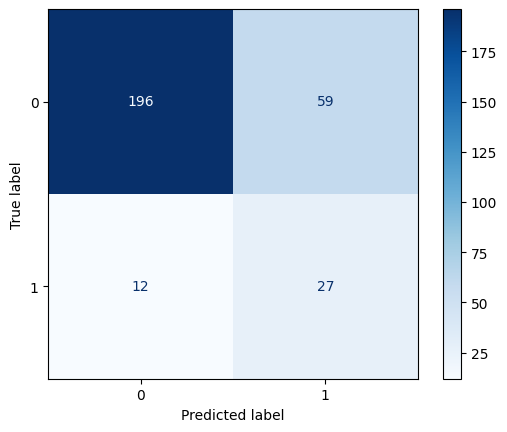

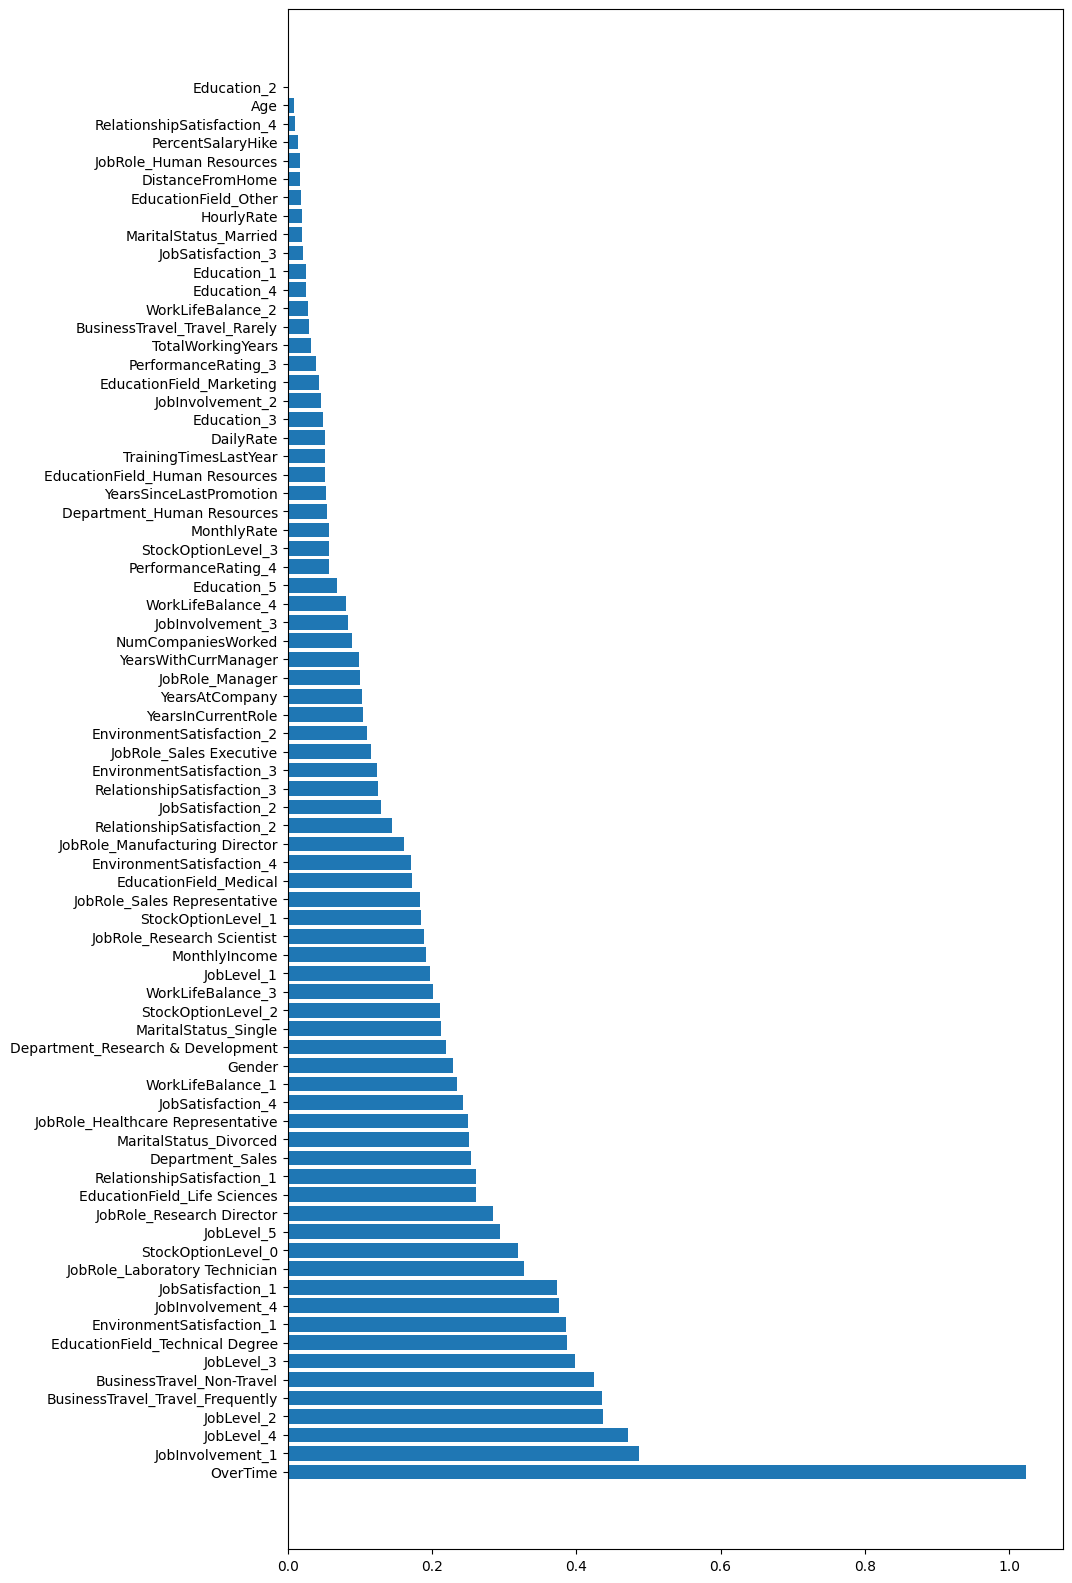

In [146]:
clf = LogisticRegression(fit_intercept=True, multi_class= 'multinomial', solver= 'sag')

clf.fit(X_overResampled, y_overResampled)
clf_prd = clf.predict(X_test)

print(classification_report(clf_prd, y_test))

disp = ConfusionMatrixDisplay.from_estimator(
clf,
X_test,
y_test,
cmap=plt.cm.Blues
)
print(disp.confusion_matrix)

coefs = np.abs(clf.coef_)[0]
indices = np.argsort(coefs)[::-1]
feature_names = X_train.columns
sorted_feature_names = feature_names[indices]
plt.figure(figsize=(10,20))
plt.barh(range(len(coefs)), coefs[indices])
plt.yticks(range(len(coefs)), sorted_feature_names)
plt.show()

In [147]:
clf = LogisticRegression()

solvers = list(['newton-cg', 'lbfgs', 'sag', 'liblinear', 'saga'])
intercept =  [True, False]
multi_classes = list(['auto', 'ovr', 'multinomial'])

param_grid = dict(solver =solvers, multi_class=multi_classes, fit_intercept= intercept)

grid_search = GridSearchCV(clf, param_grid, cv=5)

grid_search.fit(X_underResampled, y_underResampled)

print('Mejores hiperparámetros:', grid_search.best_params_)
print('Puntuación de validación cruzada:', grid_search.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Mejores hiperparámetros: {'fit_intercept': False, 'multi_class': 'auto', 'solver': 'lbfgs'}
Puntuación de validación cruzada: 0.7778481012658227


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1207, in fit
    multi_class = _check_multi_class(s

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.73      0.95      0.82       195
           1       0.74      0.29      0.42        99

    accuracy                           0.73       294
   macro avg       0.73      0.62      0.62       294
weighted avg       0.73      0.73      0.69       294



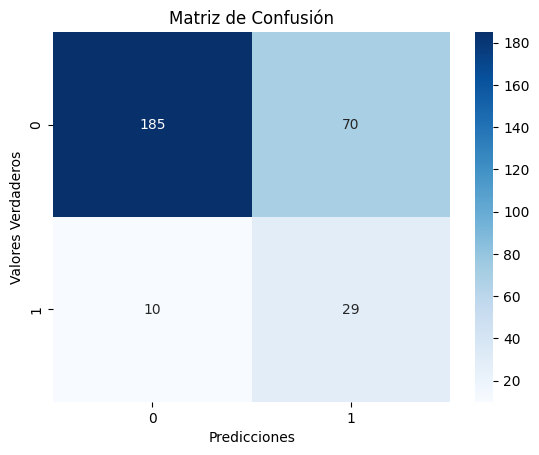

In [148]:
clf = LogisticRegression(fit_intercept=False, multi_class= 'multinomial', solver= 'lbfgs')

clf.fit(X_underResampled, y_underResampled)
clf_prd = clf.predict(X_test)

print(classification_report(clf_prd, y_test))

cm = confusion_matrix(y_test, clf_prd)

# graficar matriz de confusión con seaborn
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Matriz de Confusión")
plt.xlabel("Predicciones")
plt.ylabel("Valores Verdaderos")
plt.show()

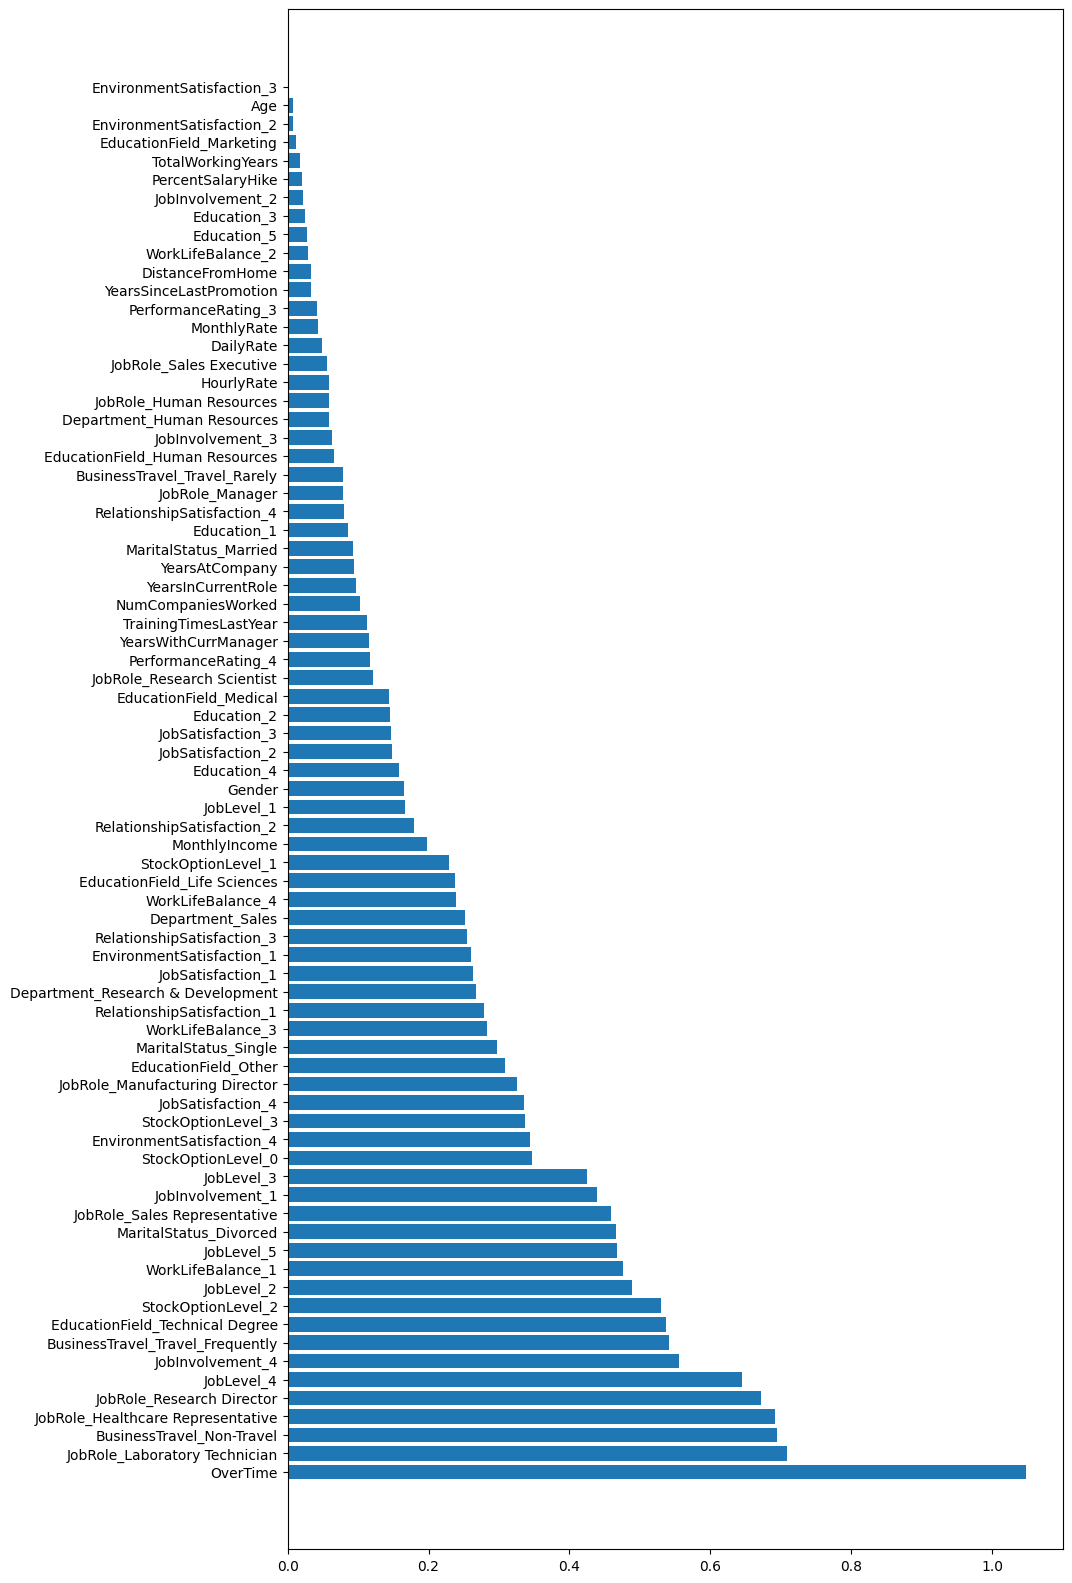

In [149]:
coefs = np.abs(clf.coef_)[0]
indices = np.argsort(coefs)[::-1]
feature_names = X_train.columns
sorted_feature_names = feature_names[indices]
plt.figure(figsize=(10,20))
plt.barh(range(len(coefs)), coefs[indices])

#plt.bar(range(len(coefs)), coefs[indices])
plt.yticks(range(len(coefs)), sorted_feature_names)

#plt.xticks(range(len(coefs)), sorted_feature_names, rotation=90)
plt.show()

In [150]:
dtc = DecisionTreeClassifier(random_state=42) 

dtc_param_grid = { 'max_depth': [3, 5, 7], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4] }

grid_search = GridSearchCV(dtc, dtc_param_grid, cv=5)

grid_search.fit(X_train, y_train)

print('Mejores hiperparámetros:', grid_search.best_params_)
print('Puntuación de validación cruzada:', grid_search.best_score_)

Mejores hiperparámetros: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}
Puntuación de validación cruzada: 0.8341651640822214


In [151]:
dtc = DecisionTreeClassifier(max_depth=3,min_samples_leaf=2,min_samples_split=2) 

dtc.fit(X_train, y_train)
dtc_prd = dtc.predict(X_test)

print(classification_report(dtc_prd, y_test))

print(pd.DataFrame({"Variable": X.columns, "Importancia": dtc.feature_importances_}).sort_values("Importancia", ascending=False).head())

              precision    recall  f1-score   support

           0       1.00      0.87      0.93       292
           1       0.03      0.50      0.05         2

    accuracy                           0.87       294
   macro avg       0.51      0.68      0.49       294
weighted avg       0.99      0.87      0.92       294

                Variable  Importancia
5          MonthlyIncome     0.318080
8               OverTime     0.312831
72  MaritalStatus_Single     0.115268
10     TotalWorkingYears     0.107217
1              DailyRate     0.056638


In [152]:
dtc = DecisionTreeClassifier(random_state=42) 
dtc_param_grid = { 'max_depth': [3, 5, 7], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4] }

grid_search = GridSearchCV(dtc, dtc_param_grid, cv=5)

grid_search.fit(X_overResampled, y_overResampled)

print('Mejores hiperparámetros:', grid_search.best_params_)
print('Puntuación de validación cruzada:', grid_search.best_score_)

Mejores hiperparámetros: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 5}
Puntuación de validación cruzada: 0.8594002818518712


In [153]:
dtc = DecisionTreeClassifier(max_depth=3,min_samples_leaf=2,min_samples_split=2) 

dtc.fit(X_overResampled, y_overResampled)
dtc_prd = dtc.predict(X_test)

print(classification_report(dtc_prd, y_test))

print(pd.DataFrame({"Variable": X.columns, "Importancia": dtc.feature_importances_}).sort_values("Importancia", ascending=False).head())

              precision    recall  f1-score   support

           0       0.73      0.91      0.81       206
           1       0.51      0.23      0.31        88

    accuracy                           0.70       294
   macro avg       0.62      0.57      0.56       294
weighted avg       0.67      0.70      0.66       294

                Variable  Importancia
8               OverTime     0.412077
5          MonthlyIncome     0.170481
44    StockOptionLevel_0     0.150843
0                    Age     0.089549
72  MaritalStatus_Single     0.083720


In [154]:
dtc = DecisionTreeClassifier(random_state=42) 
dtc_param_grid = { 'max_depth': [3, 5, 7], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4] }

grid_search = GridSearchCV(dtc, dtc_param_grid, cv=5)

grid_search.fit(X_underResampled, y_underResampled)

print('Mejores hiperparámetros:', grid_search.best_params_)
print('Puntuación de validación cruzada:', grid_search.best_score_)

Mejores hiperparámetros: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Puntuación de validación cruzada: 0.6539873417721519


In [155]:
dtc = DecisionTreeClassifier(max_depth=3,min_samples_leaf=2,min_samples_split=2) 

dtc.fit(X_underResampled, y_underResampled)
dtc_prd = dtc.predict(X_test)

print(classification_report(dtc_prd, y_test))

print(pd.DataFrame({"Variable": X.columns, "Importancia": dtc.feature_importances_}).sort_values("Importancia", ascending=False).head())

              precision    recall  f1-score   support

           0       0.67      0.89      0.76       193
           1       0.44      0.17      0.24       101

    accuracy                           0.64       294
   macro avg       0.55      0.53      0.50       294
weighted avg       0.59      0.64      0.58       294

              Variable  Importancia
29          JobLevel_1     0.342518
44  StockOptionLevel_0     0.269880
8             OverTime     0.204441
7   NumCompaniesWorked     0.112436
1            DailyRate     0.040470


In [156]:
svc = SVC(random_state=42) 
svc_param_grid = { 'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
                  'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'] }

grid_search = GridSearchCV(svc, svc_param_grid, cv=5)

grid_search.fit(X_underResampled, y_underResampled)

print('Mejores hiperparámetros:', grid_search.best_params_)
print('Puntuación de validación cruzada:', grid_search.best_score_)

Mejores hiperparámetros: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Puntuación de validación cruzada: 0.7777848101265823


In [157]:
svc = SVC()

svc.fit(X_overResampled, y_overResampled)
svc_prd = svc.predict(X_test)

print(classification_report(svc_prd, y_test))

coefs = np.abs(svc.coef_)[0]
indices = np.argsort(coefs)[::-1]
feature_names = X_train.columns
sorted_feature_names = feature_names[indices]
plt.figure(figsize=(10,20))
plt.barh(range(len(coefs)), coefs[indices])
plt.yticks(range(len(coefs)), sorted_feature_names)
plt.show()

              precision    recall  f1-score   support

           0       0.71      0.92      0.80       198
           1       0.59      0.24      0.34        96

    accuracy                           0.70       294
   macro avg       0.65      0.58      0.57       294
weighted avg       0.67      0.70      0.65       294



AttributeError: ignored

In [ ]:
rfr = RandomForestRegressor(random_state=42)
rfr_param_grid = { 'n_estimators': [100, 200, 300],
                  'max_depth': [5, 10, 15],
                  'min_samples_split': [2, 5, 10],
                  'min_samples_leaf': [1, 2, 4] }

# Definimos los modelos y los parámetros a evaluar con GridSearchCV
dtc = DecisionTreeClassifier(random_state=42)
dtc_param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

svc = SVC(random_state=42)
svc_param_grid = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

rfr = RandomForestRegressor(random_state=42)
rfr_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

mlp = MLPClassifier(random_state=42)
mlp_param_grid = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

xgb = XGBClassifier(random_state=42)
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 1],
    'subsample': [0.5, 0.75, 1.

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

coefs = np.abs(mlp.coefs_[0]).sum(axis=1)
indices = np.argsort(coefs)[::-1]
feature_names = X_train.columns
sorted_feature_names = feature_names[indices]
plt.bar(range(len(coefs)), coefs[indices])
plt.xticks(range(len(coefs)), sorted_feature_names, rotation=90)
plt.show()

print("Red neuronal - Importancia de las variables:")
print(pd.DataFrame({"Variable": X.columns, "Importancia": np.abs(mlp.coefs_[0]).sum(axis=1)}).sort_values("Importancia", ascending=False).head())

In [ ]:
# Entrenar y evaluar modelos
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
print("Árbol de decisión - Importancia de las variables:")
print(pd.DataFrame({"Variable": X.columns, "Importancia": dt.feature_importances_}).sort_values("Importancia", ascending=False).head())

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
print("Bosque aleatorio - Importancia de las variables:")
print(pd.DataFrame({"Variable": X.columns, "Importancia": rf.feature_importances_}).sort_values("Importancia", ascending=False).head())

svm = SVC(kernel="linear", random_state=42)
svm.fit(X_train, y_train)
print("SVM - Importancia de las variables:")
print(pd.DataFrame({"Variable": X.columns, "Importancia": np.abs(svm.coef_[0])}).sort_values("Importancia", ascending=False).head())

mlp = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

print("Red neuronal - Importancia de las variables:")
print(pd.DataFrame({"Variable": X.columns, "Importancia": np.abs(mlp.coefs_[0]).sum(axis=1)}).sort_values("Importancia", ascending=False).head())


# Entrenar un modelo de XGBoost
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
xgb_model.fit(X_train, y_train)
fig, ax = plt.subplots(figsize=(15, 13)) # ajuste el tamaño de la figura aquí
xgb.plot_importance(xgb_model, ax=ax)


-Género
Hay un mayor número de hombres que de mujeres, un 60% hombres frente al 40% de mujeres. En el caso de comparar la retención o fuga de empleados vemos que es muy similar entre ambos géneros, 17% para los hombres en comparación con el 15% para las mujeres. 

La diferencia en la tasa de rotación entre hombres y mujeres no es muy significativa, por lo tanto el género no parece ser un factor decisivo para determinar la tasa de rotación.

-Overtime
La cantidad de empleados que realizan horas extra es mucho mayor que los que no, en concreto un 28% trabajan horas extras, mientras que el 72% no lo hace.
Se aprecia que aquellos que realizan horas extra tienen una mayor tendencia a dejar la empresa que aquellos que no lo hacen, un 30% para aquellos que realizan horas extras, en comparación con el 10% de aquellos que no lo hacen.

Esto sugiere que el hecho de trabajar horas extras puede estar relacionado con una mayor insatisfacción laboral, estrés y/o desequilibrio entre la vida laboral y personal, lo que puede llevar a los empleados a buscar nuevas oportunidades laborales. Por lo tanto, el factor de realizar horas extra puede ser importante a la hora decidir entre abandonar la empresa o no.